# T_Series Forecasting (Stock Market)-- Exploratory --  Multiple Input->Output- One Step-Ahead (Sequence to One): a) LSTM (Vanilla),  b) Stacked LSTM, c) Bidirectional LSTM, d) Hybrid Conv-LSTM, e) ConvLSTM

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this notebook, the use of five LSTM Deep Learning model types for 'sequence to one' time series forecasting (stock market dataset) is demonstrated. **Part A** of this project is focused on data preparation/manipulation of the imported dataset features (open,close,high,low prices and trading volume of Google -'GOOGL') to apply all necessary data preprocessing/cleaning methods by use of numpy and pandas (i.e. creation of datetime object and use as index, feature engineering to extract datetime categories,mapping,etc.). Moreover, an exploratory analysis is provided in this section to highlight key aspects of the examined time series ('GOOGL Close Price') with respect to its past observations, so as to get meaningful insights in terms of its distribution,its correlations with the other dataset features and its behavior when grouped at different time periods.*

*In the second part of this work (**Part B**), the fitting and forecasting capabilities of the LSTM models ( **a)** Single LSTM Layer (Vanilla), **b)** Stacked LSTM, **c)** Bidirectional LSTM, **d)** Hybrid Convolutional Neural Network - LSTM and **e)** ConvLSTM ) are assessed. In particular, the LSTM models are trained to forecast the GOOGL Close Average Weekly price (prediction horizon of 52 Weeks) by creating a time series input sequence of 12 time steps and an output sequence consisting of the GOOGL Close Price at one-step ahead (i.e. X [index 0 to 11], y [index 12]).* 

*In terms of the forecasted outputs (one-step ahead), a 'for loop' is created that takes each X test sequence, updates the time series batch and makes the prediction. For the evaluation of the LSTM models training and forecasting performance, plots of predicted values against the actual(training set and target) GOOGL Close Average Weekly prices are presented (Performance Metric --> Root Mean Squared Error). In addition, the relative training error (percentage) distribution plot is provided for each model.*



**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*individual_stocks_5yr*" -- File: "GOOGL_data.csv" -- Source:https://www.kaggle.com/camnugent/sandp500



# Part A 

***Data Prepararation for Machine Learning - Exploratory Analysis*** 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset
dataset=pd.read_csv('GOOGL_data.csv',parse_dates=True)

In [3]:
# First 5 Records
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [4]:
# Dataset Information regarding a) the data type of each feature and b) total values per feature. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [5]:
# Creating a copy of the original dataset
data=dataset.copy()

In [6]:
# 'Date' column is converted from 'object' data type to 'datetime' 
data['date'] = pd.to_datetime(data['date'])
# Feature Engineering is applied to extract the Days of Week,Months and Years from the 'Date' column
data['Week_Day'] = data['date'].apply(lambda date:date.dayofweek)
data['Month'] = data['date'].apply(lambda date:date.month)
data['Year'] = data['date'].apply(lambda date:date.year)
data.head(2)

,date,open,high,low,close,volume,Name,Week_Day,Month,Year
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,4,2,2013
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,0,2,2013


In [7]:
# Mapping to rename the entries of the 'Week_Day' column
data['Week_Day'] = data['Week_Day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday'})
data.head(2)

,date,open,high,low,close,volume,Name,Week_Day,Month,Year
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,Friday,2,2013
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,Monday,2,2013


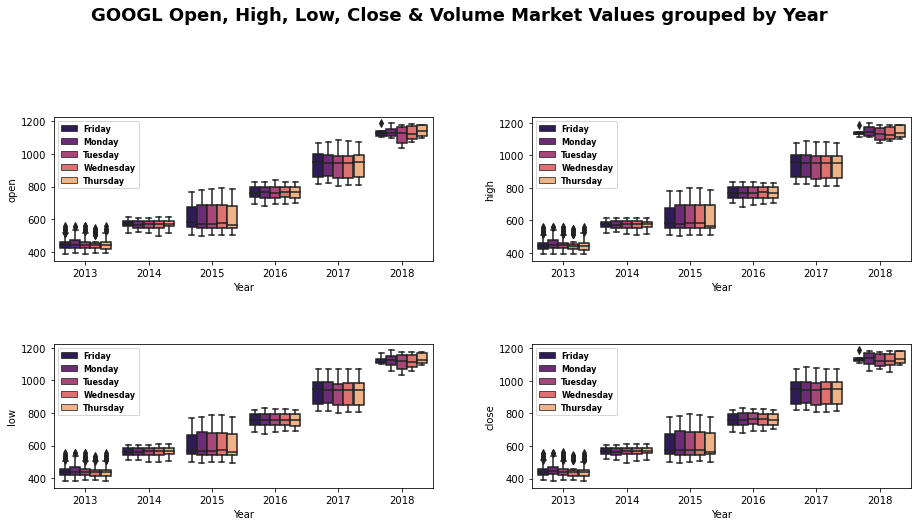

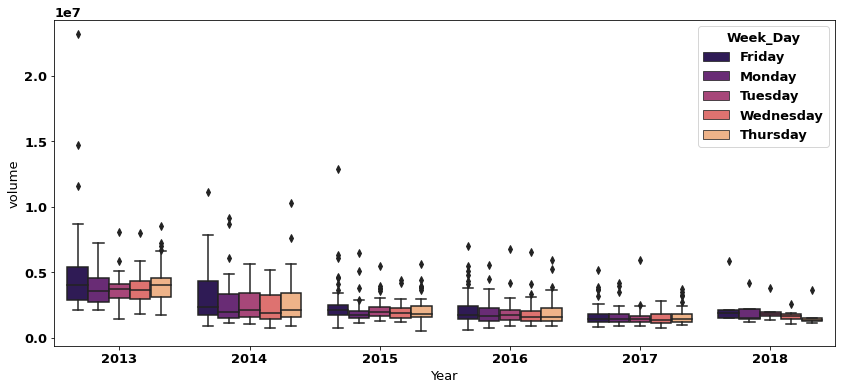

In [8]:
# Boxplots of GOOGL Open, High, Low, Close & Volume values grouped by Year
fig,axs=plt.subplots(2,2,figsize=(14,8))
sns.boxplot(x='Year',data=data,y='open',hue='Week_Day',palette='magma',ax=axs[0,0])

sns.boxplot(x='Year',data=data,y='high',hue='Week_Day',palette='magma',ax=axs[0,1])

sns.boxplot(x='Year',data=data,y='low',hue='Week_Day',palette='magma',ax=axs[1,0])

sns.boxplot(x='Year',data=data,y='close',hue='Week_Day',palette='magma',ax=axs[1,1])

for ax in axs.flat:
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=13
    ax.legend(loc='best',fontsize=8)
    
    ax.set_xlabel('Year')
    ax.figure.tight_layout(pad=4)
    fig.suptitle("GOOGL Open, High, Low, Close & Volume Market Values grouped by Year", fontweight='bold',fontsize=18)

plt.figure(figsize=(14,6))
sns.boxplot(x='Year',y='volume',hue='Week_Day',palette='magma',data=data)
plt.show()

    

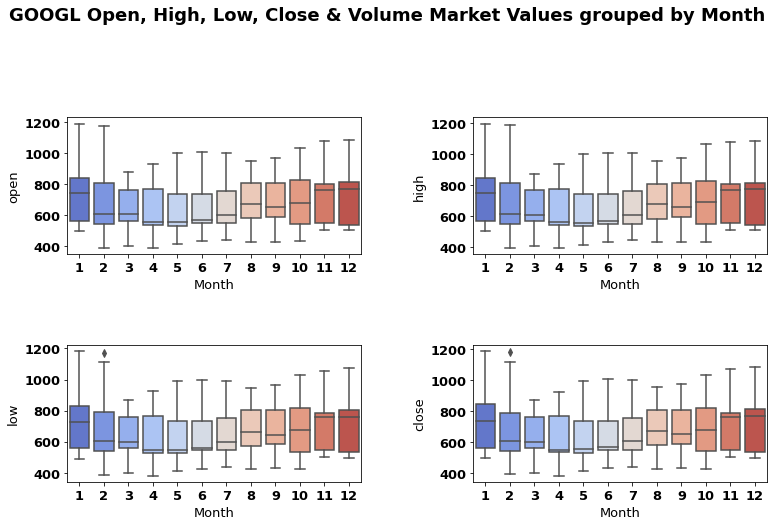

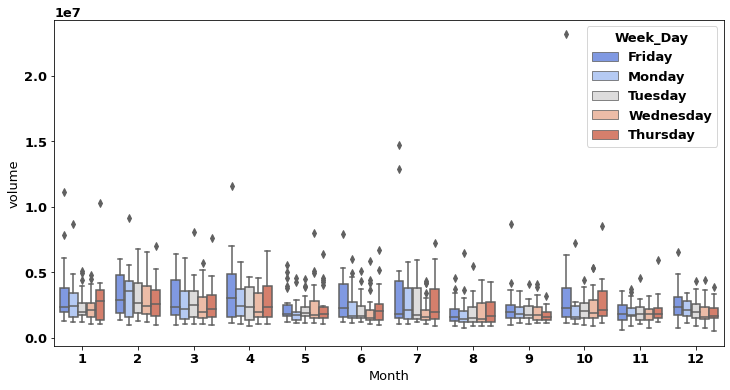

In [9]:
# Boxplots of GOOGL Open, High, Low, Close & Volume values grouped by Month. 

fig,axs=plt.subplots(2,2,figsize=(12,8))


sns.boxplot(x='Month',data=data,y='open',palette='coolwarm',ax=axs[0,0])

sns.boxplot(x='Month',data=data,y='high',palette='coolwarm',ax=axs[0,1])

sns.boxplot(x='Month',data=data,y='low',palette='coolwarm',ax=axs[1,0])

sns.boxplot(x='Month',data=data,y='close',palette='coolwarm',ax=axs[1,1])


for ax in axs.flat:  
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=13
    ax.set_xlabel('Month')
    ax.figure.tight_layout(pad=4)
    fig.suptitle("GOOGL Open, High, Low, Close & Volume Market Values grouped by Month", fontweight='bold',fontsize=18)
    
plt.figure(figsize=(12,6))
sns.boxplot(x='Month',y='volume',hue='Week_Day',palette='coolwarm',data=data)
plt.show()


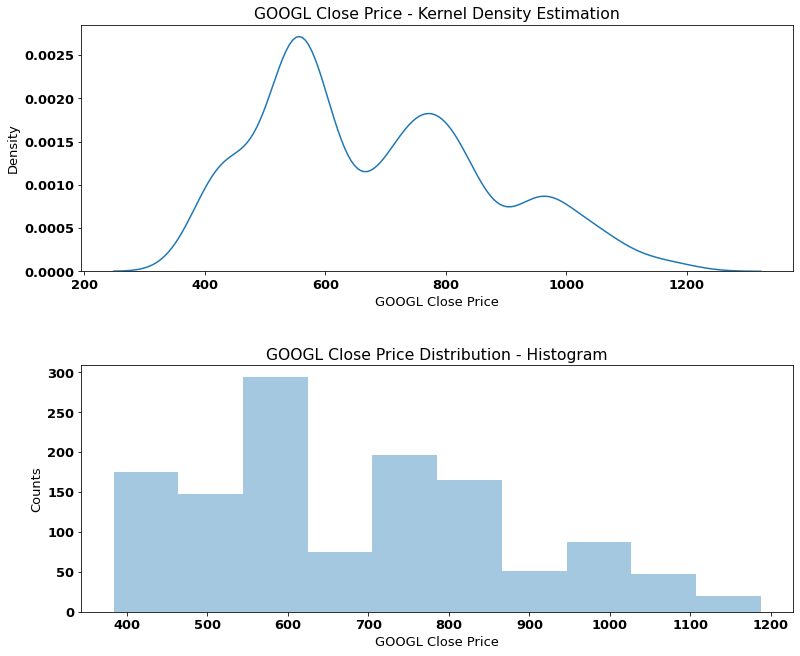

In [10]:
# GOOGL Close Price  Kernel Density Estimation plot 
fig,axs=plt.subplots(2,1,figsize=(12,10))

sns.distplot(data['close'],kde=True,hist=False,ax=axs[0])
axs[0].set_title('GOOGL Close Price - Kernel Density Estimation')

# GOOGL stock market Close values distribution - Histogram 
sns.distplot(data['close'],kde=False,bins=10,ax=axs[1])
axs[1].set_title('GOOGL Close Price Distribution - Histogram')
axs[1].set_ylabel('Counts')
for ax in axs.flat:
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=13
    ax.set_xlabel('GOOGL Close Price')
    ax.figure.tight_layout(pad=3);

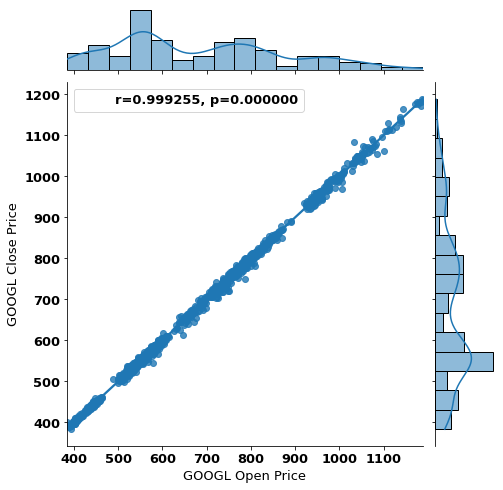

In [11]:
# The 'jointplot' presented in this cell can be used at cases where there is need/requirement to detect/drop outliers.  
# The outliers can have a negative impact on the training process of the deep learning model. In this demonstration,there
# is strong correlation between these two features (r value very close to 1 and p almost zero --> indicating evidence
# of strong relationship between the two variables)

import scipy.stats as stats
j_plot=sns.jointplot(x=data['open'], y=data['close'],height=7, kind='reg')
r, p = stats.pearsonr(data['open'],data['close'])
rp, = j_plot.ax_joint.plot([], [], linestyle="", alpha=0)
plt.xlabel('GOOGL Open Price')
plt.ylabel('GOOGL Close Price')
j_plot.ax_joint.legend([rp],['r={:f}, p={:f}'.format(r,p)])
plt.show()

In [12]:
# In this cell, the goal is to determine the percentage of change of GOOGL Close Price value on a daily(business day)
# basis. Therefore, GOOGL Close prices are shifted by 1, then the shifted values are subtracted from 'current' value
# and the difference is divided by the previous day value and finally multiplied by 100. 
# The final array is converted into a pd.dataframe and the column is renamed as presented below.
# Negative values indicate a decrease in the GOOGL Close price with respect to the previous business day
perc_close_change=100*((data['close']-data['close'].shift(1))/data['close'].shift(1))
perc_close_change=perc_close_change.dropna()
perc_close_change=pd.DataFrame(perc_close_change)
perc_close_change.rename(columns={'close':'Close_Businness_Day_Change_%'},inplace=True)
perc_close_change.head()

,Close_Businness_Day_Change_%
1,-0.375625
2,-0.219841
3,0.276680
4,0.633579
5,0.643539


In [13]:
# Summary Statistics of the GOOGL Close Price - Business Day Change %
perc_close_change.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close_Businness_Day_Change_%,1258.0,0.088007,1.387963,-5.414103,-0.564155,0.061013,0.769579,16.258433


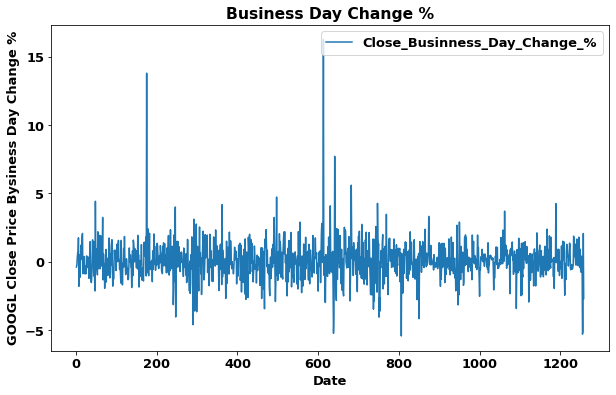

In [14]:
# GOOGL Close Price - Business Day Change % plot
perc_close_change.plot(figsize=(10,6))
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close Price Bysiness Day Change %',fontweight='bold')
plt.title('Business Day Change %',fontweight='bold')
plt.show()

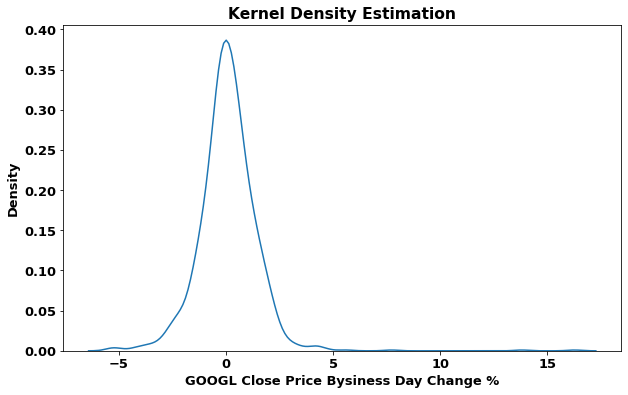

In [15]:
# GOOGL Close Price - Bysiness Day Change % - Kernel Density Estimation plot
plt.figure(figsize=(10,6))
plt.xlabel('GOOGL Close Price Bysiness Day Change %',fontweight='bold')
plt.ylabel('Density',fontweight='bold')
plt.title('Kernel Density Estimation',fontweight='bold')
sns.distplot(perc_close_change,kde=True,hist=False);

# Part B 

***Time Series Forecasting (Step-Ahead) of the parameter of interest (dependent variable) based on input (independent variables)***

In [16]:
# Setting the 'date' feature as dataset index
data=data.set_index('date')
data.head()

,open,high,low,close,volume,Name,Week_Day,Month,Year
date,,,,,,,,,
2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,Friday,2,2013
2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,Monday,2,2013
2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,Tuesday,2,2013
2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,Wednesday,2,2013
2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL,Thursday,2,2013


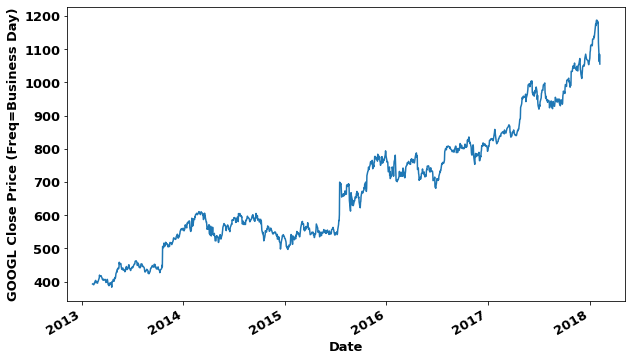

In [17]:
# GOOGL Close Price past observations (Business Day Freq.)
plt.figure(figsize=(10,6))
data['close'].plot()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close Price (Freq=Business Day)',fontweight='bold');

In [18]:
# Dropping the features that are not going to be used as LSTM model inputs
data=data.drop(['Week_Day','Month','Year','Name'],axis=1)

In [19]:
# Changing the frequency of observations from 'Business Day' to 'Weekly' GOOGL Close Average Weekly price)
data=data.resample('W').mean()
data.shape

(262, 5)

In [20]:
# The index has been updated (frequency=Week)
data.head()

,open,high,low,close,volume
date,,,,,
2013-02-10,390.455100,393.728300,390.16980,393.077700,6031199.00
2013-02-17,391.131760,394.218840,390.18280,393.061640,3871970.80
2013-02-24,400.218575,403.236575,396.90825,399.718075,5622951.75
2013-03-03,399.499120,402.726320,396.71432,399.205820,4384643.80
2013-03-10,414.795900,418.270820,412.14572,415.975980,5856758.80


In [21]:
# DatetimeIndex: 262 entries, 2013-02-10 to 2018-02-11
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2013-02-10 to 2018-02-11
Freq: W-SUN
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    262 non-null    float64
 1   high    262 non-null    float64
 2   low     262 non-null    float64
 3   close   262 non-null    float64
 4   volume  262 non-null    float64
dtypes: float64(5)
memory usage: 12.3 KB


In [22]:
# No presence of missing/'NaN' entries
data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

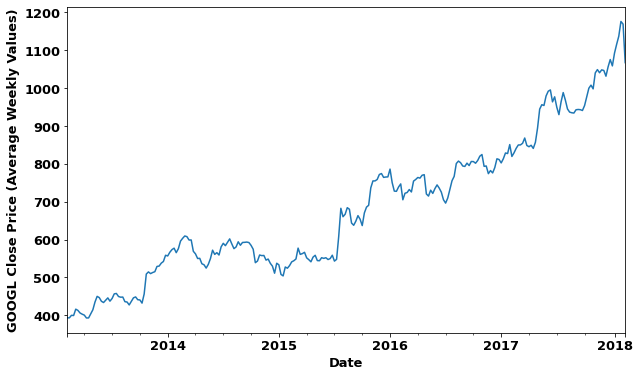

In [23]:
# GOOGL Close price past observations (Freq=Week.)
plt.figure(figsize=(10,6))
data['close'].plot()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close Price (Average Weekly Values)',fontweight='bold');

**i) Time Series Forecasting - Single LSTM Layer (VANILLA)**

In [24]:
# Function to create the input-output sequence. Each train batch consists of 12 inputs & the corresponding 
# y_target value (one step-ahead)
from numpy import array

def set_seq(seq, seq_len):
    X = []
    y = []
    for t in range(len(seq)-seq_len):
        end = t + seq_len # End index is equal to the current index plus the specified number of sequence length
        
        if end> len(seq)-1:# if the length of the formed train sequence is greater than the length of the input feature,stop
            break
# for seq_length=12 : X_input seq. ->12 (indices 0-11) past observations, y_target -> 1 observation at one time step ahead
# (index 12)
        Xseq= seq[t:end, :-1]
        y_target =seq[end, -1]
        X.append(Xseq)
        y.append(y_target)
    return array(X), array(y) #initializing the arrays

In [25]:
# Defining the inputs and output of the LSTM model so as to create the sequences
input_1 =data['open'].values
input_2 = data['high'].values
input_3 = data['low'].values
input_4 = data['volume'].values
output_feat = data['close'].values

In [26]:
# Reshaping for converting the inputs/output to 2d shape
input_1 = input_1.reshape((len(input_1), 1))
input_2 = input_2.reshape((len(input_2), 1))
input_3 = input_3.reshape((len(input_3), 1))
input_4 = input_4.reshape((len(input_4), 1))
output_feat = output_feat.reshape((len(output_feat), 1))

In [27]:
# Use of hstack to put together the input sequence arrays horizontally (column wise)
from numpy import hstack
df = hstack((input_1, input_2,input_3, input_4))
df[:5]

array([[3.90455100e+02, 3.93728300e+02, 3.90169800e+02, 6.03119900e+06],
       [3.91131760e+02, 3.94218840e+02, 3.90182800e+02, 3.87197080e+06],
       [4.00218575e+02, 4.03236575e+02, 3.96908250e+02, 5.62295175e+06],
       [3.99499120e+02, 4.02726320e+02, 3.96714320e+02, 4.38464380e+06],
       [4.14795900e+02, 4.18270820e+02, 4.12145720e+02, 5.85675880e+06]])

In [28]:
# Selecting the length of each sequence and the size of the prediction horizon (forecast_steps)
seq_len= 12
pred_horizon=52
# Splitting the dataset into training and test set (y_test -->to compare the LSTM forecasts for given inputs (X_test))
X_train=df[:-pred_horizon]
y_train=output_feat[:-pred_horizon]
X_test=df[-pred_horizon:]
y_test=output_feat[-pred_horizon:]



In [29]:
# The shape of training and test data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(210, 4) (210, 1)
(52, 4) (52, 1)


In [30]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [31]:
# Use of hstack to put together the train sequence arrays horizontally 
df_train = hstack((X_train,y_train))
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(df_train, seq_len)

In [32]:
# The input training data have been converted into 3d shape--> [sample_length,seq_len, number of input features]
print(Xtrain_seq.shape)

(198, 12, 4)


In [33]:
# Presenting the first two training sequences. As it can be observed, the first 12 input entries (seq_len=12),
# i.e. The current index input value at time step 12 and the past 11 observations for each feature, together with the
# GOOGL Close price at time step 13 (one-step ahead),comprise the first sequence.
# In the second batch, the sequence is updated by dropping the first input values and appending the next X-y values
# at the end of the batch.
# As it can be observed, the first two y target values correspond to the y_train values with indices 12 and 13 for
# time steps 13 and 14 respectively
for t in range(2):
    print(Xtrain_seq[t], ytrain_seq[t])
print('\r')
print('The first two ytrain_seq values correspond to the  train target values (y_train) with indexes 12 and 13 : ')
print(y_train[12:14])


[[0.         0.         0.00686396 0.69188401]
 [0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44639133]
 [0.00286412 0.00858992 0.         0.70536546]
 [0.02894855 0.02773971 0.02658795 0.49325622]] 0.04724923430697603
[[0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44

In [34]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

4

In [35]:
# Reshaping the target train data to be inserted into the LSTM model in the required dimension
ytrain_seq=ytrain_seq.reshape((-1,1))
ytrain_seq.shape

(198, 1)

In [36]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# Use of the he_uniform initializer to set the initial weights 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
# Use of 12 neurons--> equal to the length of an input train sequence
model.add(LSTM(12, activation='relu',  input_shape=(seq_len, features_num),kernel_initializer=initializer ))

# The output layer consists of 1 neuron with a 'linear' activation fuction
model.add(Dense(1,activation='linear'))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the LSTM model 
model.fit( Xtrain_seq, ytrain_seq,epochs=60, batch_size=1, shuffle=False,verbose=0)




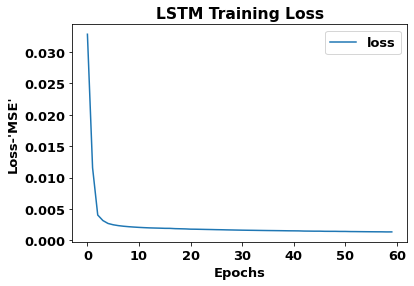

In [37]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

***Training Set Predictions***

In [38]:
# Determining all LSTM training set predictions so as to compare them with the actual GOOGL Close training values 

train_lstm_outputs = []
train_batch = Xtrain_seq[0].reshape((1, seq_len, features_num))

for i in range(len(Xtrain_seq[1:])):
    train_lstm_out = model.predict(train_batch)[0]
    train_lstm_outputs.append(train_lstm_out)
    train_batch=Xtrain_seq[1:][i].reshape((1, seq_len, features_num))
    
#Append train_lstm_output from last train batch    
train_lstm_outputs.append(model.predict(train_batch)[0]) 

In [39]:
# Last appended input to the final train sequence (train_batch) is X_train[-2]. 
# The X_train[-1] is to be appended to the input sequence after training to determine the first forecasted value 
# This is because the model is trained to predict one step ahead 
print('Final train batch (sequence): \n')
print(train_batch)
print("\r")
print('Last appended input of the final train batch: \n')
print(X_train[-2])

Final train batch (sequence): 

[[[0.83773548 0.8409872  0.83195241 0.18540854]
  [0.85806043 0.85187924 0.8575283  0.03166475]
  [0.84598644 0.85009322 0.84011992 0.16424988]
  [0.85734891 0.86280911 0.86243346 0.10823462]
  [0.92106321 0.92149912 0.92810612 0.13457196]
  [0.91526665 0.90783283 0.92036614 0.02349207]
  [0.90610943 0.89810875 0.90423963 0.03278214]
  [0.90907408 0.91387402 0.91654029 0.0964174 ]
  [0.95180413 0.94424431 0.95768955 0.04221066]
  [0.95525182 0.94338797 0.95902415 0.02800441]
  [1.         1.         1.         0.22075701]
  [0.9427742  0.93570083 0.94070964 0.16433382]]]

Last appended input of the final train batch: 

[0.9427742  0.93570083 0.94070964 0.16433382]


In [40]:
# Applying the inverse_transform function to get the original values
vanilla_trainset_predictions=scaler.inverse_transform(train_lstm_outputs)
vanilla_trainset_predictions=vanilla_trainset_predictions.reshape((-1,1))

In [41]:
# Length of train sequences
len(Xtrain_seq)

198

In [42]:
# Applying the inverse_transform function to the ytrain_seq set
ytrain_seq=scaler.inverse_transform(ytrain_seq)

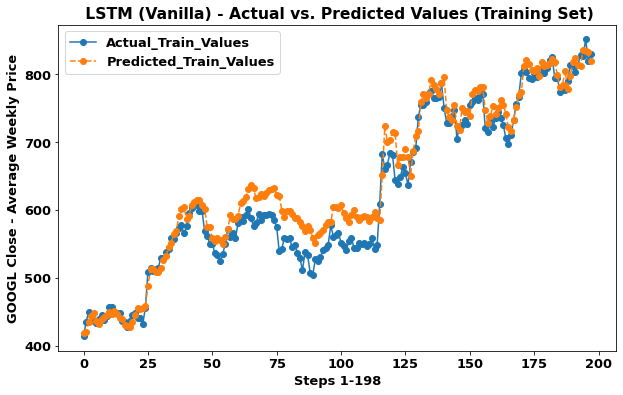

In [43]:
# LSTM Training Performance - Actual vs. Predicted Training Set Values for 198 training steps (198 training sequences)

plt.figure(figsize=(10,6))
plt.plot(ytrain_seq,marker='o',linestyle='-')

plt.plot(vanilla_trainset_predictions,marker='o',linestyle='dashed')
plt.title(' LSTM (Vanilla) - Actual vs. Predicted Values (Training Set)',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Steps 1-198',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

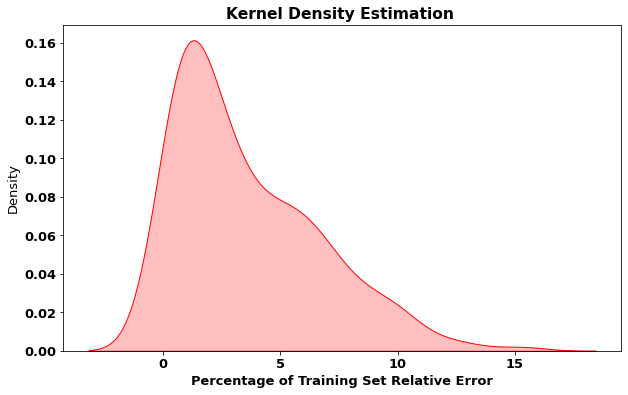

In [44]:
# Training relative Error Percentage distribution plot
vanilla_trainset_error=abs((ytrain_seq-vanilla_trainset_predictions)/ytrain_seq)*100
vanilla_trainset_error=pd.DataFrame(vanilla_trainset_error,columns=['Training Set Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(vanilla_trainset_error['Training Set Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Set Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [45]:
# Summary statistics of training relative error

vanilla_trainset_error.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Set Error,198.0,3.603016,3.065537,0.042861,1.132784,2.641281,5.55207,15.24596


In [46]:
# Determining the Root Mean Squared Error of the training set predicted values and the actual_train values
RMSE=np.sqrt(mean_squared_error(ytrain_seq,vanilla_trainset_predictions))
RMSE=RMSE.round(2)
RMSE

27.13

***Time Series Forecasting & comparison with Test Set*** 

In [47]:
# Creating the first batch to forecast the first GOOGL Close price.
# First batch consists of the final train batch, where the last X train input (X_train[-1]) is appended 
first_batch=np.append(train_batch[:,1:,:],[[X_train[-1].reshape((1,features_num))]])
first_batch=first_batch.reshape((1, seq_len, features_num))
print('First Batch - step-ahead prediction: \n ',first_batch)
print('\r')
print ('Appended Input: \n',X_train[-1])

First Batch - step-ahead prediction: 
  [[[0.85806043 0.85187924 0.8575283  0.03166475]
  [0.84598644 0.85009322 0.84011992 0.16424988]
  [0.85734891 0.86280911 0.86243346 0.10823462]
  [0.92106321 0.92149912 0.92810612 0.13457196]
  [0.91526665 0.90783283 0.92036614 0.02349207]
  [0.90610943 0.89810875 0.90423963 0.03278214]
  [0.90907408 0.91387402 0.91654029 0.0964174 ]
  [0.95180413 0.94424431 0.95768955 0.04221066]
  [0.95525182 0.94338797 0.95902415 0.02800441]
  [1.         1.         1.         0.22075701]
  [0.9427742  0.93570083 0.94070964 0.16433382]
  [0.95275716 0.94550553 0.95898134 0.05204019]]]

Appended Input: 
 [0.95275716 0.94550553 0.95898134 0.05204019]


In [48]:
# Determining all LSTM predicted values so as to compare them with the actual test values 
lstm_outputs = []
batch =first_batch

# loop to determine the other predictions based on the X_test inputs that are appended to the batch
for i in range(len(X_test)):
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
    
# The first row of the current batch sequence is dropped, and the next X_test input is placed at the end of the batch
    batch = np.append(batch[:,1:,:],[[X_test[i]]],axis=1)

    



In [49]:
# Applying the inverse_transform function to the predicted values to get their true values
vanilla_lstm_predictions=scaler.inverse_transform(lstm_outputs)
vanilla_lstm_predictions

array([[ 839.97169667],
       [ 844.54095418],
       [ 850.77271322],
       [ 850.26794918],
       [ 855.65035117],
       [ 864.89078575],
       [ 833.86460613],
       [ 848.21702266],
       [ 846.99868507],
       [ 848.09778878],
       [ 858.20664255],
       [ 872.31911659],
       [ 931.81966324],
       [ 939.69477977],
       [ 930.0786738 ],
       [ 956.22497609],
       [ 963.08859824],
       [ 958.92830257],
       [ 902.60687091],
       [ 975.5514609 ],
       [ 892.99748311],
       [ 912.85819906],
       [ 949.68546473],
       [ 961.14513514],
       [ 876.70378826],
       [ 952.95530234],
       [ 905.63545517],
       [ 930.03028112],
       [ 916.27676496],
       [ 927.75904775],
       [ 926.83232248],
       [ 922.13014897],
       [ 920.28926087],
       [ 921.0781817 ],
       [ 960.69605545],
       [ 972.22318066],
       [ 978.84953667],
       [ 938.17865789],
       [1016.54300945],
       [1014.00354081],
       [1007.4709661 ],
       [1019.881

In [50]:
# Applying the inverse_transform function to the y_test set
y_test=scaler.inverse_transform(y_test)

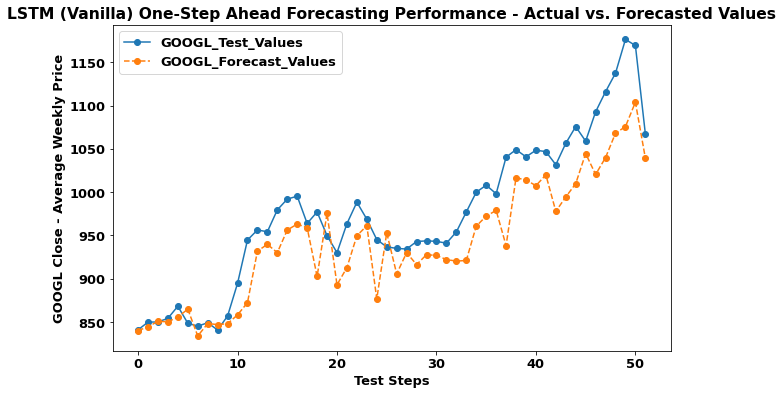

In [51]:
# Plot of the Test vs. Predicted results for a prediction horizon of 52 weeks
plt.figure(figsize=(10,6))
plt.plot(y_test,marker='o',linestyle='-')
plt.plot(vanilla_lstm_predictions,marker='o',linestyle='dashed')
plt.title('LSTM (Vanilla) One-Step Ahead Forecasting Performance - Actual vs. Forecasted Values',fontweight='bold')
plt.legend(('GOOGL_Test_Values','GOOGL_Forecast_Values'))
plt.xlabel('Test Steps',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

In [52]:
# Date index of first y_train value
data.index[seq_len]

Timestamp('2013-05-05 00:00:00', freq='W-SUN')

In [53]:
# LSTM training outputs indices
vanilla_trainset_index=pd.date_range(start='2013-05-05',periods=198,freq='W')

In [54]:
# Converting the training set predictions from np.ndarray to pandas dataframe
vanilla_trainset_data=pd.DataFrame(data=vanilla_trainset_predictions,index=vanilla_trainset_index,columns=['Predicted (Training Set)'])

In [55]:
# Date index of first forecasted value
data.index[-pred_horizon]

Timestamp('2017-02-19 00:00:00', freq='W-SUN')

In [56]:
# LSTM forecasted outputs indices
vanilla_pred_index=pd.date_range(start='2017-02-19',periods=pred_horizon,freq='W')

In [57]:
# Converting the vanilla_lstm_predictions from np.ndarray to pandas dataframe
vanilla_pred_data=pd.DataFrame(data=vanilla_lstm_predictions,index=vanilla_pred_index,columns=['Vanilla LSTM Forecast'])

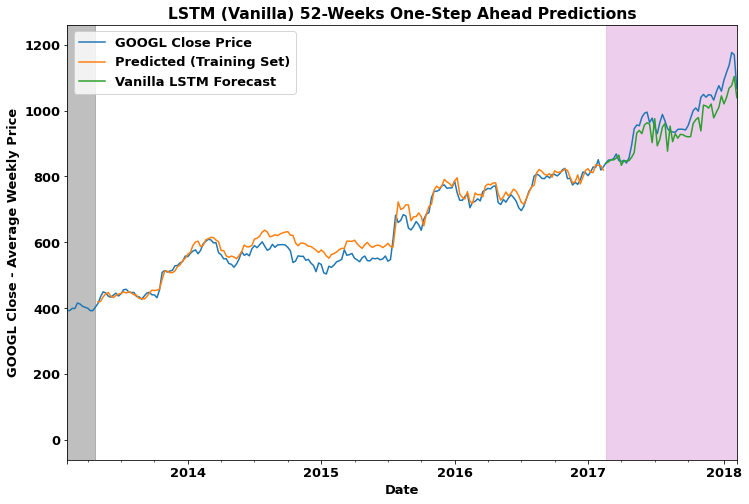

In [58]:
# Final plot comprising the actual GOOGL Close values, the LSTM model's predictions on the training set (index 12 to 209) & 
# the LSTM forecasts from index 210 (time step 211)  to 261 (time step 262)

ax=data['close'].plot(figsize=(12,8),label='GOOGL Close Price')
ax.fill_between(data.index,0,1200 ,where=data.index < vanilla_trainset_index[0],
                color='grey', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(data.index,0,1200 ,where=data.index > vanilla_trainset_index[-1],
                color='plum', alpha=0.5, transform=ax.get_xaxis_transform())
vanilla_trainset_data.plot(ax=ax)
vanilla_pred_data.plot(ax=ax)
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold')
plt.title('LSTM (Vanilla) 52-Weeks One-Step Ahead Predictions',fontweight='bold')
plt.show()


In [59]:
# RMSE of forecasted and test GOOGL Close prices
RMSE=np.sqrt(mean_squared_error(y_test,vanilla_lstm_predictions))
RMSE=RMSE.round(2)
RMSE

43.05

**ii) Time Series Forecasting - LSTM (STACKED)**

In [60]:
# Function to create the input-output sequence. Each train batch consists of 12 inputs & the corresponding 
# y_target value (one step-ahead)
from numpy import array

def set_seq(seq, seq_len):
    X = []
    y = []
    for t in range(len(seq)-seq_len):
        end = t + seq_len # End index is equal to the current index plus the specified number of sequence length
        
        if end> len(seq)-1:# if the length of the formed train sequence is greater than the length of the input feature,stop
            break
# for seq_length=12 : X_input seq. ->12 (indices 0-11) past observations, y_target -> 1 observation at one time step ahead
# (index 12)
        Xseq= seq[t:end, :-1]
        y_target =seq[end, -1]
        X.append(Xseq)
        y.append(y_target)
    return array(X), array(y) #initializing the arrays

In [61]:
# Defining the inputs and output of the Stacked LSTM model so as to create the sequences
input_1 =data['open'].values
input_2 = data['high'].values
input_3 = data['low'].values
input_4 = data['volume'].values
output_feat = data['close'].values

In [62]:
# Reshaping for converting the inputs/output to 2d shape
input_1 = input_1.reshape((len(input_1), 1))
input_2 = input_2.reshape((len(input_2), 1))
input_3 = input_3.reshape((len(input_3), 1))
input_4 = input_4.reshape((len(input_4), 1))
output_feat = output_feat.reshape((len(output_feat), 1))

In [63]:
# Use of hstack to put together the input sequence arrays horizontally (column wise)
from numpy import hstack
df = hstack((input_1, input_2,input_3, input_4))
df[:5]

array([[3.90455100e+02, 3.93728300e+02, 3.90169800e+02, 6.03119900e+06],
       [3.91131760e+02, 3.94218840e+02, 3.90182800e+02, 3.87197080e+06],
       [4.00218575e+02, 4.03236575e+02, 3.96908250e+02, 5.62295175e+06],
       [3.99499120e+02, 4.02726320e+02, 3.96714320e+02, 4.38464380e+06],
       [4.14795900e+02, 4.18270820e+02, 4.12145720e+02, 5.85675880e+06]])

In [64]:
# Selecting the length of each sequence and the size of the prediction horizon (forecast_steps)
seq_len= 12
pred_horizon=52
# Splitting the dataset into training and test set (y_test -->to compare the Stacked LSTM forecasts for given inputs (X_test))
X_train=df[:-pred_horizon]
y_train=output_feat[:-pred_horizon]
X_test=df[-pred_horizon:]
y_test=output_feat[-pred_horizon:]



In [65]:
# The shape of training and test data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(210, 4) (210, 1)
(52, 4) (52, 1)


In [66]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [67]:
# Use of hstack to put together the train sequence arrays horizontally 
df_train = hstack((X_train,y_train))
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(df_train, seq_len)

In [68]:
# The input training data have been converted into 3d shape--> [sample_length,seq_len, number of input features]
print(Xtrain_seq.shape)

(198, 12, 4)


In [69]:
# Presenting the first two training sequences. As it can be observed, the first 12 input entries (seq_len=12),
# i.e. The current index input value at time step 12 and the past 11 observations for each feature, together with the
# GOOGL Close price at time step 13 (one-step ahead),comprise the first sequence.
# In the second batch, the sequence is updated by dropping the first input values and appending the next X-y values
# at the end of the batch.
# As it can be observed, the first two y target values correspond to the y_train values with indices 12 and 13 for
# time steps 13 and 14 respectively
for t in range(2):
    print(Xtrain_seq[t], ytrain_seq[t])
print('\r')
print('The first two ytrain_seq values correspond to the  train target values (y_train) with indexes 12 and 13 : ')
print(y_train[12:14])


[[0.         0.         0.00686396 0.69188401]
 [0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44639133]
 [0.00286412 0.00858992 0.         0.70536546]
 [0.02894855 0.02773971 0.02658795 0.49325622]] 0.04724923430697603
[[0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44

In [70]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

4

In [71]:
# Reshaping the target train data to be inserted into the Stacked LSTM model in the required dimension
ytrain_seq=ytrain_seq.reshape((-1,1))
ytrain_seq.shape

(198, 1)

In [72]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# Use of the he_uniform initializer to set the initial weights 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
# Use of 12 neurons--> equal to the length of an input train sequence
model.add(LSTM(12, activation='relu',kernel_initializer=initializer,input_shape=(seq_len, features_num),return_sequences=True
              ))
model.add(LSTM(12,activation='relu'))

# The output layer consists of 1 neuron with a 'linear' activation fuction
model.add(Dense(1,activation='linear'))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the Stacked LSTM model 
model.fit( Xtrain_seq, ytrain_seq,epochs=60, batch_size=1, shuffle=False, verbose=0)





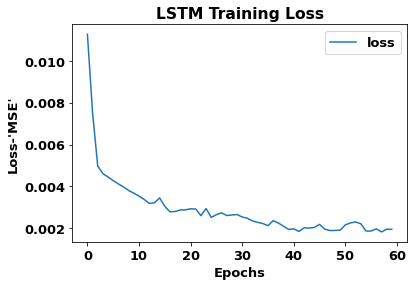

In [73]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

***Training Set Predictions***

In [74]:
# Determining all Stacked LSTM training set predictions so as to compare them with the actual GOOGL Close training values 

train_lstm_outputs = []
train_batch = Xtrain_seq[0].reshape((1, seq_len, features_num))

for i in range(len(Xtrain_seq[1:])):
    train_lstm_out = model.predict(train_batch)[0]
    train_lstm_outputs.append(train_lstm_out)
    train_batch=Xtrain_seq[1:][i].reshape((1, seq_len, features_num))
    
#Append train_lstm_output from last train batch    
train_lstm_outputs.append(model.predict(train_batch)[0]) 

In [75]:
# Last appended input to the final train sequence (train_batch) is X_train[-2]. 
# The X_train[-1] is to be appended to the input sequence after training to determine the first forecasted value 
# This is because the model is trained to predict one step ahead 
print('Final train batch (sequence): \n')
print(train_batch)
print("\r")
print('Last appended input of the final train batch: \n')
print(X_train[-2])

Final train batch (sequence): 

[[[0.83773548 0.8409872  0.83195241 0.18540854]
  [0.85806043 0.85187924 0.8575283  0.03166475]
  [0.84598644 0.85009322 0.84011992 0.16424988]
  [0.85734891 0.86280911 0.86243346 0.10823462]
  [0.92106321 0.92149912 0.92810612 0.13457196]
  [0.91526665 0.90783283 0.92036614 0.02349207]
  [0.90610943 0.89810875 0.90423963 0.03278214]
  [0.90907408 0.91387402 0.91654029 0.0964174 ]
  [0.95180413 0.94424431 0.95768955 0.04221066]
  [0.95525182 0.94338797 0.95902415 0.02800441]
  [1.         1.         1.         0.22075701]
  [0.9427742  0.93570083 0.94070964 0.16433382]]]

Last appended input of the final train batch: 

[0.9427742  0.93570083 0.94070964 0.16433382]


In [76]:
# Applying the inverse_transform function to get the original values
stacked_trainset_predictions=scaler.inverse_transform(train_lstm_outputs)
stacked_trainset_predictions=stacked_trainset_predictions.reshape((-1,1))

In [77]:
# Length of train sequences
len(Xtrain_seq)

198

In [78]:
# Applying the inverse_transform function to the ytrain_seq set
ytrain_seq=scaler.inverse_transform(ytrain_seq)

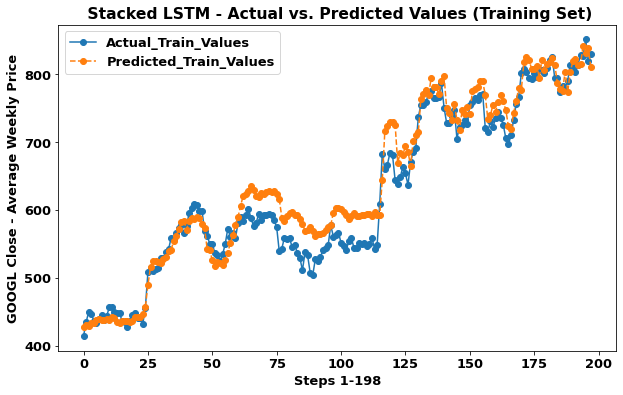

In [79]:
# Stacked LSTM Training Performance - Actual vs. Predicted Training Set Values'for 198 training steps (198 training sequences)

plt.figure(figsize=(10,6))
plt.plot(ytrain_seq,marker='o',linestyle='-')

plt.plot(stacked_trainset_predictions,marker='o',linestyle='dashed')
plt.title(' Stacked LSTM - Actual vs. Predicted Values (Training Set)',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Steps 1-198',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

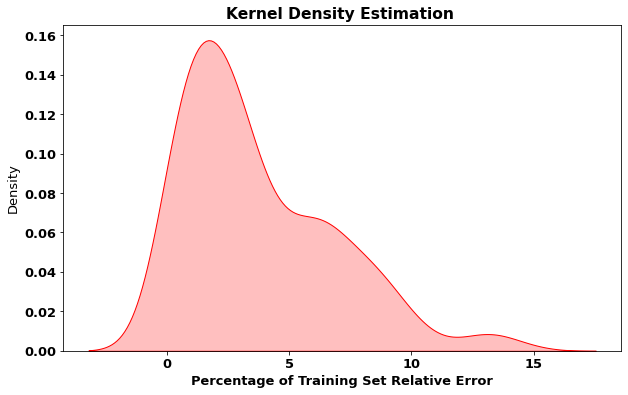

In [80]:
# Training relative Error Percentage distribution plot
stacked_trainset_error=abs((ytrain_seq-stacked_trainset_predictions)/ytrain_seq)*100
stacked_trainset_error=pd.DataFrame(stacked_trainset_error,columns=['Training Set Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(stacked_trainset_error['Training Set Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Set Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [81]:
# Summary statistics of training relative error

stacked_trainset_error.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Set Error,198.0,3.761009,3.100116,0.029164,1.284657,2.786665,5.898475,14.30928


In [82]:
# Determining the Root Mean Squared Error of the training set predicted values and the actual_train values
RMSE=np.sqrt(mean_squared_error(ytrain_seq,stacked_trainset_predictions))
RMSE=RMSE.round(2)
RMSE

28.35

***Time Series Forecasting & comparison with Test Set*** 

In [83]:
# Creating the first batch to forecast the first GOOGL Close price.
# First batch consists of the final train batch, where the last X train input (X_train[-1]) is appended 
first_batch=np.append(train_batch[:,1:,:],[[X_train[-1].reshape((1,features_num))]])
first_batch=first_batch.reshape((1, seq_len, features_num))
print('First Batch - step-ahead prediction: \n ',first_batch)
print('\r')
print ('Appended Input: \n',X_train[-1])

First Batch - step-ahead prediction: 
  [[[0.85806043 0.85187924 0.8575283  0.03166475]
  [0.84598644 0.85009322 0.84011992 0.16424988]
  [0.85734891 0.86280911 0.86243346 0.10823462]
  [0.92106321 0.92149912 0.92810612 0.13457196]
  [0.91526665 0.90783283 0.92036614 0.02349207]
  [0.90610943 0.89810875 0.90423963 0.03278214]
  [0.90907408 0.91387402 0.91654029 0.0964174 ]
  [0.95180413 0.94424431 0.95768955 0.04221066]
  [0.95525182 0.94338797 0.95902415 0.02800441]
  [1.         1.         1.         0.22075701]
  [0.9427742  0.93570083 0.94070964 0.16433382]
  [0.95275716 0.94550553 0.95898134 0.05204019]]]

Appended Input: 
 [0.95275716 0.94550553 0.95898134 0.05204019]


In [84]:
# Determining all Stacked LSTM predicted values so as to compare them with the actual test values 
lstm_outputs = []
batch =first_batch

# loop to determine the other predictions based on the X_test inputs that are appended to the batch
for i in range(len(X_test)):
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
    
# The first row of the current batch sequence is dropped, and the next X_test input is placed at the end of the batch
    batch = np.append(batch[:,1:,:],[[X_test[i]]],axis=1)

    



In [85]:
# Applying the inverse_transform function to the predicted values to get their true values
stacked_lstm_predictions=scaler.inverse_transform(lstm_outputs)
stacked_lstm_predictions

array([[ 835.6054044 ],
       [ 838.00106048],
       [ 848.1114709 ],
       [ 844.3324724 ],
       [ 848.16147485],
       [ 856.90921625],
       [ 822.22914358],
       [ 840.43328418],
       [ 833.52154245],
       [ 843.80277466],
       [ 854.12565406],
       [ 864.3642013 ],
       [ 921.59690097],
       [ 914.44521676],
       [ 909.6120116 ],
       [ 933.14226902],
       [ 933.96019269],
       [ 936.54849096],
       [ 869.73425933],
       [ 951.68851746],
       [ 849.0221381 ],
       [ 890.84531976],
       [ 923.31937447],
       [ 937.09080576],
       [ 853.55985298],
       [ 926.71150464],
       [ 864.88958412],
       [ 913.36020483],
       [ 885.44942681],
       [ 916.12563342],
       [ 898.43554214],
       [ 904.92108966],
       [ 895.20475732],
       [ 896.70187169],
       [ 938.73582913],
       [ 958.03309262],
       [ 951.36500749],
       [ 907.35650858],
       [ 992.51626281],
       [ 965.38910755],
       [ 976.29952651],
       [ 982.070

In [86]:
# Applying the inverse_transform function to the y_test set
y_test=scaler.inverse_transform(y_test)

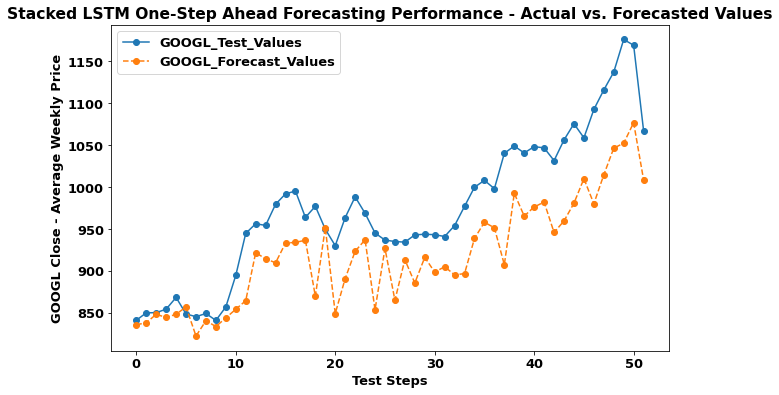

In [87]:
# Plot of the Test vs. Predicted results for a prediction horizon of 52 weeks
plt.figure(figsize=(10,6))
plt.plot(y_test,marker='o',linestyle='-')
plt.plot(stacked_lstm_predictions,marker='o',linestyle='dashed')
plt.title('Stacked LSTM One-Step Ahead Forecasting Performance - Actual vs. Forecasted Values',fontweight='bold')
plt.legend(('GOOGL_Test_Values','GOOGL_Forecast_Values'))
plt.xlabel('Test Steps',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

In [88]:
# Date index of first y_train value
data.index[seq_len]

Timestamp('2013-05-05 00:00:00', freq='W-SUN')

In [89]:
# Stacked LSTM training outputs indices
stacked_trainset_index=pd.date_range(start='2013-05-05',periods=198,freq='W')

In [90]:
# Converting the training set predictions from np.ndarray to pandas dataframe
stacked_trainset_data=pd.DataFrame(data=stacked_trainset_predictions,index=stacked_trainset_index,columns=['Predicted (Training Set)'])

In [91]:
# Date index of first forecasted value
data.index[-pred_horizon]

Timestamp('2017-02-19 00:00:00', freq='W-SUN')

In [92]:
# Stacked LSTM forecasted outputs indices
stacked_pred_index=pd.date_range(start='2017-02-19',periods=pred_horizon,freq='W')

In [93]:
# Converting the stacked_lstm_predictions from np.ndarray to pandas dataframe
stacked_pred_data=pd.DataFrame(data=stacked_lstm_predictions,index=stacked_pred_index,columns=['Stacked LSTM Forecast'])

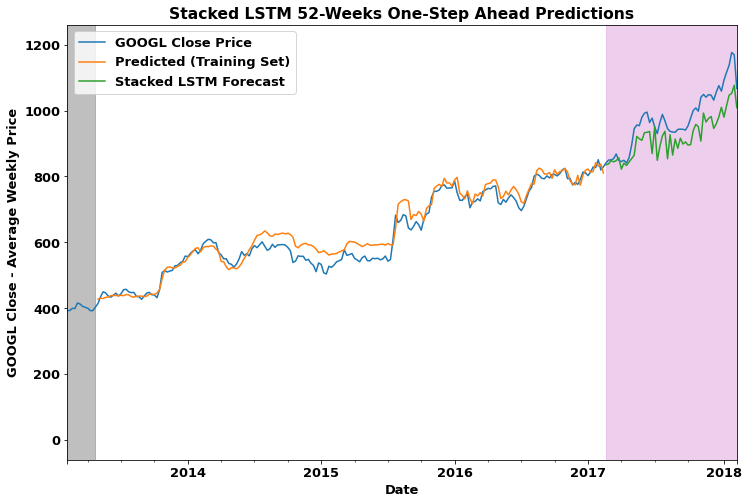

In [94]:
# Final plot comprising the actual GOOGL Close values, the LSTM model's predictions on the training set (index 12 to 209) & 
# the LSTM forecasts from index 210 (time step 211)  to 261 (time step 262)

ax=data['close'].plot(figsize=(12,8),label='GOOGL Close Price')
ax.fill_between(data.index,0,1200 ,where=data.index < stacked_trainset_index[0],
                color='grey', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(data.index,0,1200 ,where=data.index > stacked_trainset_index[-1],
                color='plum', alpha=0.5, transform=ax.get_xaxis_transform())
stacked_trainset_data.plot(ax=ax)
stacked_pred_data.plot(ax=ax)
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold')
plt.title('Stacked LSTM 52-Weeks One-Step Ahead Predictions',fontweight='bold')
plt.show()


In [95]:
# RMSE of forecasted and test GOOGL Close prices
RMSE=np.sqrt(mean_squared_error(y_test,stacked_lstm_predictions))
RMSE=RMSE.round(2)
RMSE

64.45

***iii) Time Series Forecasting (LSTM - BIDIRECTIONAL)***

In [96]:
# Function to create the input-output sequence. Each train batch consists of 12 inputs & the corresponding 
# y_target value (one step-ahead)
from numpy import array

def set_seq(seq, seq_len):
    X = []
    y = []
    for t in range(len(seq)-seq_len):
        end = t + seq_len # End index is equal to the current index plus the specified number of sequence length
        
        if end> len(seq)-1:# if the length of the formed train sequence is greater than the length of the input feature,stop
            break
# for seq_length=12 : X_input seq. ->12 (indices 0-11) past observations, y_target -> 1 observation at one time step ahead
# (index 12)
        Xseq= seq[t:end, :-1]
        y_target =seq[end, -1]
        X.append(Xseq)
        y.append(y_target)
    return array(X), array(y) #initializing the arrays

In [97]:
# Defining the inputs and output of the Bidirectional LSTM model so as to create the sequences
input_1 =data['open'].values
input_2 = data['high'].values
input_3 = data['low'].values
input_4 = data['volume'].values
output_feat = data['close'].values

In [98]:
# Reshaping for converting the inputs/output to 2d shape
input_1 = input_1.reshape((len(input_1), 1))
input_2 = input_2.reshape((len(input_2), 1))
input_3 = input_3.reshape((len(input_3), 1))
input_4 = input_4.reshape((len(input_4), 1))
output_feat = output_feat.reshape((len(output_feat), 1))

In [99]:
# Use of hstack to put together the input sequence arrays horizontally (column wise)
from numpy import hstack
df = hstack((input_1, input_2,input_3, input_4))
df[:5]

array([[3.90455100e+02, 3.93728300e+02, 3.90169800e+02, 6.03119900e+06],
       [3.91131760e+02, 3.94218840e+02, 3.90182800e+02, 3.87197080e+06],
       [4.00218575e+02, 4.03236575e+02, 3.96908250e+02, 5.62295175e+06],
       [3.99499120e+02, 4.02726320e+02, 3.96714320e+02, 4.38464380e+06],
       [4.14795900e+02, 4.18270820e+02, 4.12145720e+02, 5.85675880e+06]])

In [100]:
# Selecting the length of each sequence and the size of the prediction horizon (forecast_steps)
seq_len= 12
pred_horizon=52
# Splitting the dataset into training/test set(y_test -->to compare the Bidirectional LSTM forecasts for given inputs (X_test))
X_train=df[:-pred_horizon]
y_train=output_feat[:-pred_horizon]
X_test=df[-pred_horizon:]
y_test=output_feat[-pred_horizon:]



In [101]:
# The shape of training and test data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(210, 4) (210, 1)
(52, 4) (52, 1)


In [102]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [103]:
# Use of hstack to put together the train sequence arrays horizontally 
df_train = hstack((X_train,y_train))
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(df_train, seq_len)

In [104]:
# The input training data have been converted into 3d shape--> [sample_length,seq_len, number of input features]
print(Xtrain_seq.shape)

(198, 12, 4)


In [105]:
# Presenting the first two training sequences. As it can be observed, the first 12 input entries (seq_len=12),
# i.e. The current index input value at time step 12 and the past 11 observations for each feature, together with the
# GOOGL Close price at time step 13 (one-step ahead),comprise the first sequence.
# In the second batch, the sequence is updated by dropping the first input values and appending the next X-y values
# at the end of the batch.
# As it can be observed, the first two y target values correspond to the y_train values with indices 12 and 13 for
# time steps 13 and 14 respectively
for t in range(2):
    print(Xtrain_seq[t], ytrain_seq[t])
print('\r')
print('The first two ytrain_seq values correspond to the  train target values (y_train) with indexes 12 and 13 : ')
print(y_train[12:14])


[[0.         0.         0.00686396 0.69188401]
 [0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44639133]
 [0.00286412 0.00858992 0.         0.70536546]
 [0.02894855 0.02773971 0.02658795 0.49325622]] 0.04724923430697603
[[0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44

In [106]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

4

In [107]:
# Reshaping the target train data to be inserted into the Bidirectional LSTM model in the required dimension
ytrain_seq=ytrain_seq.reshape((-1,1))
ytrain_seq.shape

(198, 1)

In [108]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional
from tensorflow.keras import initializers
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# Use of the he_uniform initializer to set the initial weights of the model layers. 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
# Use of 12 neurons--> equal to the length of an input train sequence
model.add(Bidirectional(LSTM(12, activation='relu', kernel_initializer=initializer,input_shape=(seq_len, features_num))))
# The output layer consists of 1 neuron with a 'linear' activation fuction
model.add(Dense(1,activation='linear'))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the Bidirectional LSTM model 
model.fit( Xtrain_seq, ytrain_seq,epochs=60, batch_size=1, shuffle=False,verbose=0)





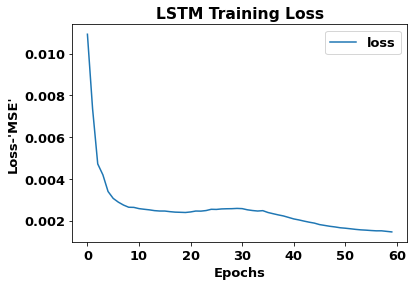

In [109]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

***Training Set Predictions***

In [110]:
# Determining all Bidirectional LSTM training set predictions so as to compare them with the actual GOOGL Close training values 

train_lstm_outputs = []
train_batch = Xtrain_seq[0].reshape((1, seq_len, features_num))

for i in range(len(Xtrain_seq[1:])):
    train_lstm_out = model.predict(train_batch)[0]
    train_lstm_outputs.append(train_lstm_out)
    train_batch=Xtrain_seq[1:][i].reshape((1, seq_len, features_num))
    
#Append train_lstm_output from last train batch    
train_lstm_outputs.append(model.predict(train_batch)[0]) 

In [111]:
# Last appended input to the final train sequence (train_batch) is X_train[-2]. 
# The X_train[-1] is to be appended to the input sequence after training to determine the first forecasted value 
# This is because the model is trained to predict one step ahead 
print('Final train batch (sequence): \n')
print(train_batch)
print("\r")
print('Last appended input of the final train batch: \n')
print(X_train[-2])

Final train batch (sequence): 

[[[0.83773548 0.8409872  0.83195241 0.18540854]
  [0.85806043 0.85187924 0.8575283  0.03166475]
  [0.84598644 0.85009322 0.84011992 0.16424988]
  [0.85734891 0.86280911 0.86243346 0.10823462]
  [0.92106321 0.92149912 0.92810612 0.13457196]
  [0.91526665 0.90783283 0.92036614 0.02349207]
  [0.90610943 0.89810875 0.90423963 0.03278214]
  [0.90907408 0.91387402 0.91654029 0.0964174 ]
  [0.95180413 0.94424431 0.95768955 0.04221066]
  [0.95525182 0.94338797 0.95902415 0.02800441]
  [1.         1.         1.         0.22075701]
  [0.9427742  0.93570083 0.94070964 0.16433382]]]

Last appended input of the final train batch: 

[0.9427742  0.93570083 0.94070964 0.16433382]


In [112]:
# Applying the inverse_transform function to get the original values
bidirect_trainset_predictions=scaler.inverse_transform(train_lstm_outputs)
bidirect_trainset_predictions=bidirect_trainset_predictions.reshape((-1,1))

In [113]:
# Length of train sequences
len(Xtrain_seq)

198

In [114]:
# Applying the inverse_transform function to the ytrain_seq set
ytrain_seq=scaler.inverse_transform(ytrain_seq)

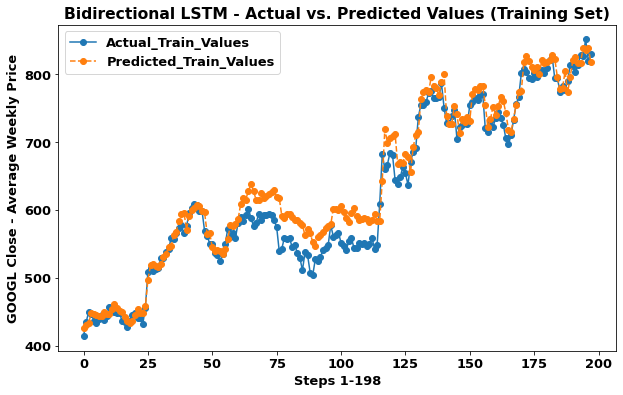

In [115]:
# Bidirectional LSTM Training Performance: Actual vs. Training Set predictions'for 198 training steps (198 training sequences)

plt.figure(figsize=(10,6))
plt.plot(ytrain_seq,marker='o',linestyle='-')

plt.plot(bidirect_trainset_predictions,marker='o',linestyle='dashed')
plt.title('Bidirectional LSTM - Actual vs. Predicted Values (Training Set)',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Steps 1-198',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

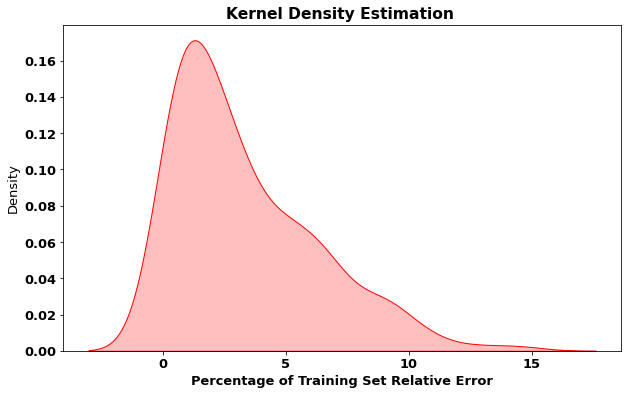

In [116]:
# Training relative Error Percentage distribution plot
bidirect_trainset_error=abs((ytrain_seq-bidirect_trainset_predictions)/ytrain_seq)*100
bidirect_trainset_error=pd.DataFrame(bidirect_trainset_error,columns=['Training Set Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(bidirect_trainset_error['Training Set Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Set Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [117]:
# Summary statistics of training relative error

bidirect_trainset_error.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Set Error,198.0,3.350631,2.915873,0.020337,1.027705,2.435819,5.118473,14.559129


In [118]:
# Determining the Root Mean Squared Error of the training set predicted values and the actual_train values
RMSE=np.sqrt(mean_squared_error(ytrain_seq,bidirect_trainset_predictions))
RMSE=RMSE.round(2)
RMSE

25.74

***Time Series Forecasting & comparison with Test Set*** 

In [119]:
# Creating the first batch to forecast the first GOOGL Close price.
# First batch consists of the final train batch, where the last X train input (X_train[-1]) is appended 
first_batch=np.append(train_batch[:,1:,:],[[X_train[-1].reshape((1,features_num))]])
first_batch=first_batch.reshape((1, seq_len, features_num))
print('First Batch - step-ahead prediction: \n ',first_batch)
print('\r')
print ('Appended Input: \n',X_train[-1])

First Batch - step-ahead prediction: 
  [[[0.85806043 0.85187924 0.8575283  0.03166475]
  [0.84598644 0.85009322 0.84011992 0.16424988]
  [0.85734891 0.86280911 0.86243346 0.10823462]
  [0.92106321 0.92149912 0.92810612 0.13457196]
  [0.91526665 0.90783283 0.92036614 0.02349207]
  [0.90610943 0.89810875 0.90423963 0.03278214]
  [0.90907408 0.91387402 0.91654029 0.0964174 ]
  [0.95180413 0.94424431 0.95768955 0.04221066]
  [0.95525182 0.94338797 0.95902415 0.02800441]
  [1.         1.         1.         0.22075701]
  [0.9427742  0.93570083 0.94070964 0.16433382]
  [0.95275716 0.94550553 0.95898134 0.05204019]]]

Appended Input: 
 [0.95275716 0.94550553 0.95898134 0.05204019]


In [120]:
# Determining all Bidirectional LSTM predicted values so as to compare them with the actual test values 
lstm_outputs = []
batch =first_batch

# loop to determine the other predictions based on the X_test inputs that are appended to the batch
for i in range(len(X_test)):
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
    
# The first row of the current batch sequence is dropped, and the next X_test input is placed at the end of the batch
    batch = np.append(batch[:,1:,:],[[X_test[i]]],axis=1)

    



In [121]:
# Applying the inverse_transform function to the predicted values to get their true values
bidirect_lstm_predictions=scaler.inverse_transform(lstm_outputs)
bidirect_lstm_predictions

array([[ 840.60265855],
       [ 845.60840601],
       [ 852.22878121],
       [ 851.54352776],
       [ 856.67905062],
       [ 865.81286838],
       [ 829.89334777],
       [ 843.81861425],
       [ 846.95537199],
       [ 847.237344  ],
       [ 858.76201135],
       [ 876.70449831],
       [ 929.08891789],
       [ 933.05171026],
       [ 926.96275332],
       [ 949.28505082],
       [ 954.29161756],
       [ 952.60273491],
       [ 893.36949501],
       [ 950.99010077],
       [ 874.98830602],
       [ 892.71799627],
       [ 931.85232557],
       [ 946.82210378],
       [ 873.93142302],
       [ 921.37017635],
       [ 888.73821731],
       [ 911.19711762],
       [ 903.08326024],
       [ 916.71076973],
       [ 916.55231921],
       [ 916.44723172],
       [ 914.84519372],
       [ 921.42796355],
       [ 950.91696556],
       [ 963.44487978],
       [ 966.90703186],
       [ 935.5146573 ],
       [ 995.31686621],
       [ 991.50662548],
       [ 987.6259805 ],
       [ 995.782

In [122]:
# Applying the inverse_transform function to the y_test set
y_test=scaler.inverse_transform(y_test)

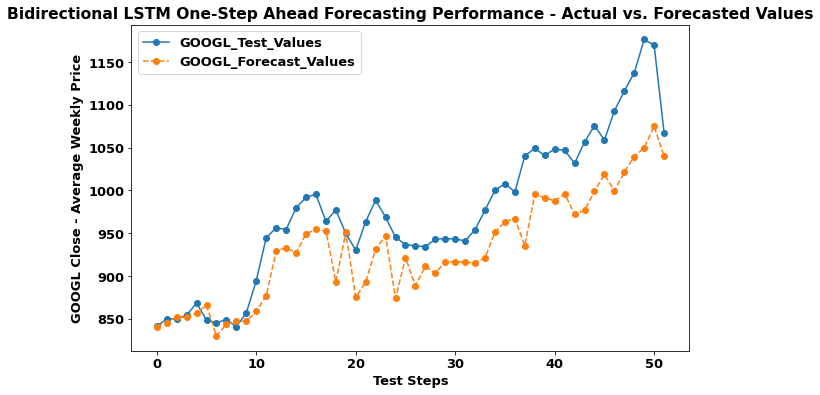

In [123]:
# Plot of the Test vs. Predicted results for a prediction horizon of 52 weeks
plt.figure(figsize=(10,6))
plt.plot(y_test,marker='o',linestyle='-')
plt.plot(bidirect_lstm_predictions,marker='o',linestyle='dashed')
plt.title('Bidirectional LSTM One-Step Ahead Forecasting Performance - Actual vs. Forecasted Values',fontweight='bold')
plt.legend(('GOOGL_Test_Values','GOOGL_Forecast_Values'))
plt.xlabel('Test Steps',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

In [124]:
# Date index of first y_train value
data.index[seq_len]

Timestamp('2013-05-05 00:00:00', freq='W-SUN')

In [125]:
# Bidirectional LSTM training outputs indices
bidirect_trainset_index=pd.date_range(start='2013-05-05',periods=198,freq='W')

In [126]:
# Converting the training set predictions from np.ndarray to pandas dataframe
bidirect_trainset_data=pd.DataFrame(data=bidirect_trainset_predictions,index=bidirect_trainset_index,columns=['Predicted (Training Set)'])

In [127]:
# Date index of first forecasted value
data.index[-pred_horizon]

Timestamp('2017-02-19 00:00:00', freq='W-SUN')

In [128]:
# Bidirectional LSTM forecasted outputs indices
bidirect_pred_index=pd.date_range(start='2017-02-19',periods=pred_horizon,freq='W')

In [129]:
# Converting the Bidirectional_lstm_predictions from np.ndarray to pandas dataframe
bidirect_pred_data=pd.DataFrame(data=bidirect_lstm_predictions,index=bidirect_pred_index,columns=['Bidirectional LSTM Forecast'])

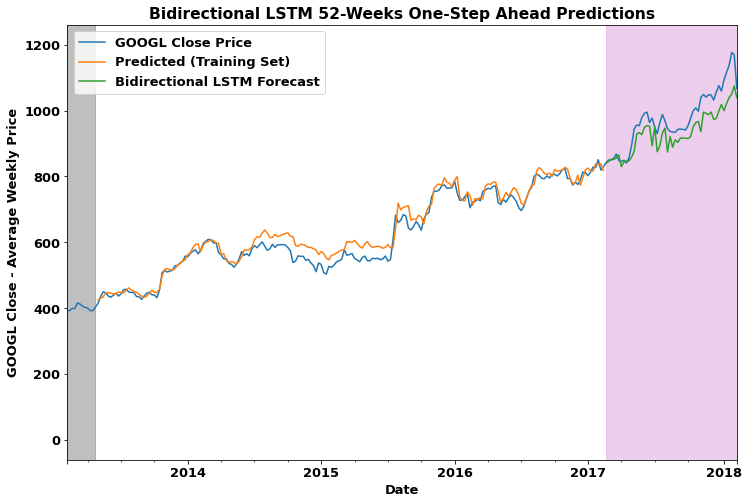

In [130]:
# Final plot comprising the actual GOOGL Close values, the Bidirectional LSTM training set predictions (index 12 to 209) & 
# the Bidirectional LSTM forecasts from index 210 (time step 211)  to 261 (time step 262)

ax=data['close'].plot(figsize=(12,8),label='GOOGL Close Price')
ax.fill_between(data.index,0,1200 ,where=data.index < bidirect_trainset_index[0],
                color='grey', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(data.index,0,1200 ,where=data.index > bidirect_trainset_index[-1],
                color='plum', alpha=0.5, transform=ax.get_xaxis_transform())
bidirect_trainset_data.plot(ax=ax)
bidirect_pred_data.plot(ax=ax)
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold')
plt.title('Bidirectional LSTM 52-Weeks One-Step Ahead Predictions',fontweight='bold')
plt.show()


In [131]:
# RMSE of forecasted and test GOOGL Close prices
RMSE=np.sqrt(mean_squared_error(y_test,bidirect_lstm_predictions))
RMSE=RMSE.round(2)
RMSE

53.27

***iv) Time Series Forecasting (Hybrid Convolutional-LSTM)***

In [132]:
# Function to create the input-output sequence. Each train batch consists of 12 inputs & the corresponding 
# y_target value (one step-ahead)
from numpy import array

def set_seq(seq, seq_len):
    X = []
    y = []
    for t in range(len(seq)-seq_len):
        end = t + seq_len # End index is equal to the current index plus the specified number of sequence length
        
        if end> len(seq)-1:# if the length of the formed train sequence is greater than the length of the input feature,stop
            break
# for seq_length=12 : X_input seq. ->12 (indices 0-11) past observations, y_target -> 1 observation at one time step ahead
# (index 12)
        Xseq= seq[t:end, :-1]
        y_target =seq[end, -1]
        X.append(Xseq)
        y.append(y_target)
    return array(X), array(y) #initializing the arrays

In [133]:
# Defining the inputs and output of the  hybrid model so as to create the sequences
input_1 =data['open'].values
input_2 = data['high'].values
input_3 = data['low'].values
input_4 = data['volume'].values
output_feat = data['close'].values

In [134]:
# Reshaping for converting the inputs/output to 2d shape
input_1 = input_1.reshape((len(input_1), 1))
input_2 = input_2.reshape((len(input_2), 1))
input_3 = input_3.reshape((len(input_3), 1))
input_4 = input_4.reshape((len(input_4), 1))
output_feat = output_feat.reshape((len(output_feat), 1))

In [135]:
# Use of hstack to put together the input sequence arrays horizontally (column wise)
from numpy import hstack
df = hstack((input_1, input_2,input_3, input_4))
df[:5]

array([[3.90455100e+02, 3.93728300e+02, 3.90169800e+02, 6.03119900e+06],
       [3.91131760e+02, 3.94218840e+02, 3.90182800e+02, 3.87197080e+06],
       [4.00218575e+02, 4.03236575e+02, 3.96908250e+02, 5.62295175e+06],
       [3.99499120e+02, 4.02726320e+02, 3.96714320e+02, 4.38464380e+06],
       [4.14795900e+02, 4.18270820e+02, 4.12145720e+02, 5.85675880e+06]])

In [136]:
# Selecting the length of each sequence and the size of the prediction horizon (forecast_steps)
seq_len= 12
pred_horizon=52
# Splitting the dataset into training and test set (y_test -->to compare the LSTM forecasts for given inputs (X_test))
X_train=df[:-pred_horizon]
y_train=output_feat[:-pred_horizon]
X_test=df[-pred_horizon:]
y_test=output_feat[-pred_horizon:]



In [137]:
# The shape of training and test data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(210, 4) (210, 1)
(52, 4) (52, 1)


In [138]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [139]:
# Use of hstack to put together the train sequence arrays horizontally 
df_train = hstack((X_train,y_train))
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(df_train, seq_len)

In [140]:
# The input training data have been converted into 3d shape--> [sample_length,seq_len, number of input features]
print(Xtrain_seq.shape)

(198, 12, 4)


In [141]:
# Presenting the first two training sequences. As it can be observed, the first 12 input entries (seq_len=12),
# i.e. The current index input value at time step 12 and the past 11 observations for each feature, together with the
# GOOGL Close price at time step 13 (one-step ahead),comprise the first sequence.
# In the second batch, the sequence is updated by dropping the first input values and appending the next X-y values
# at the end of the batch.
# As it can be observed, the first two y target values correspond to the y_train values with indices 12 and 13 for
# time steps 13 and 14 respectively
for t in range(2):
    print(Xtrain_seq[t], ytrain_seq[t])
print('\r')
print('The first two ytrain_seq values correspond to the  train target values (y_train) with indexes 12 and 13 : ')
print(y_train[12:14])


[[0.         0.         0.00686396 0.69188401]
 [0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44639133]
 [0.00286412 0.00858992 0.         0.70536546]
 [0.02894855 0.02773971 0.02658795 0.49325622]] 0.04724923430697603
[[0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44

In [142]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

4

In [143]:
# Input training data are converted from 3d shape to 4d shape--> [sample_length,no_subseq,sub_seq_len, number of input features]
# so as to become the inputs of the convolutional layer. The input sequences are split into two sub-sequences and the
# convolutional model extracts information from each subsequence (similar to 2D images)
no_sub_seq=2
sub_seq_len=6
Xtrain_seq = Xtrain_seq.reshape((Xtrain_seq.shape[0], no_sub_seq, sub_seq_len, features_num))
Xtrain_seq.shape

(198, 2, 6, 4)

In [144]:
#First Input sequence to be processed by the hybrid convolutional LSTM model
Xtrain_seq[0]

array([[[0.        , 0.        , 0.00686396, 0.69188401],
        [0.00147234, 0.00105938, 0.0068925 , 0.39447725],
        [0.02124421, 0.02053432, 0.02165471, 0.63565304],
        [0.01967876, 0.01943236, 0.02122904, 0.46509157],
        [0.05296281, 0.05300268, 0.05510063, 0.66785705],
        [0.05121483, 0.04674223, 0.05309468, 0.41122652]],

       [[0.03451129, 0.03206527, 0.03785499, 0.32098899],
        [0.03159811, 0.02673051, 0.03185675, 0.36681538],
        [0.02236206, 0.01960099, 0.0217647 , 0.49236566],
        [0.00465879, 0.00162192, 0.0039417 , 0.44639133],
        [0.00286412, 0.00858992, 0.        , 0.70536546],
        [0.02894855, 0.02773971, 0.02658795, 0.49325622]]])

In [145]:
# Reshaping the target train data to be processed by the deep learning model
ytrain_seq=ytrain_seq.reshape((-1,1))
ytrain_seq.shape

(198, 1)

In [146]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten,TimeDistributed,Conv1D,MaxPooling1D
from tensorflow.keras import initializers
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# Use of the he_uniform initializer to set the initial weights. 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
# Use of TimeDistributed Layer to apply the convolutional model to each sub-sequence
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu',kernel_initializer=initializer, 
                          input_shape=(None, sub_seq_len, features_num))))
# MaxPooling layer to downsample the input sequences by selecting the max value over the window (based on pool_size)
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
# Sequence are flattened 1D so as to be further processed by the LSTM layer
model.add(TimeDistributed(Flatten()))
model.add(LSTM(12, activation='relu'))
# Output Dense Layer with linear activation
model.add(Dense(1,activation='linear'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the Hybrid model 
model.fit( Xtrain_seq, ytrain_seq,epochs=60, batch_size=1, shuffle=False,verbose=0)




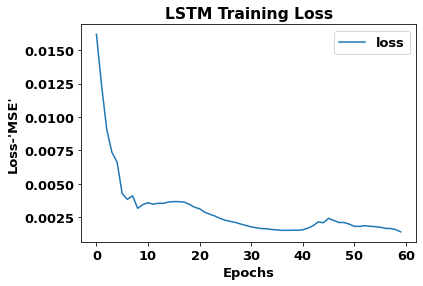

In [147]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

***Training Set Predictions***

In [148]:
# Determining all model predictions on the training set so as to compare them with the actual GOOGL Close training values 

train_lstm_outputs = []
train_batch = Xtrain_seq[0].reshape((1,no_sub_seq, sub_seq_len, features_num))

for i in range(len(Xtrain_seq[1:])):
    train_lstm_out = model.predict(train_batch)[0]
    train_lstm_outputs.append(train_lstm_out)
    train_batch=Xtrain_seq[1:][i].reshape((1, no_sub_seq, sub_seq_len, features_num))
    
#Append train_lstm_output from last train batch    
train_lstm_outputs.append(model.predict(train_batch)[0]) 

In [149]:
# Last appended input to the final train sequence (train_batch) is X_train[-2]. 
# The X_train[-1] is to be appended to the input sequence after training to determine the first forecasted value 
# This is because the model is trained to predict one step ahead 
print('Final train batch (sequence): \n')
print(train_batch)
print("\r")
print('Last input of the final train batch: \n')
print(X_train[-2])

Final train batch (sequence): 

[[[[0.83773548 0.8409872  0.83195241 0.18540854]
   [0.85806043 0.85187924 0.8575283  0.03166475]
   [0.84598644 0.85009322 0.84011992 0.16424988]
   [0.85734891 0.86280911 0.86243346 0.10823462]
   [0.92106321 0.92149912 0.92810612 0.13457196]
   [0.91526665 0.90783283 0.92036614 0.02349207]]

  [[0.90610943 0.89810875 0.90423963 0.03278214]
   [0.90907408 0.91387402 0.91654029 0.0964174 ]
   [0.95180413 0.94424431 0.95768955 0.04221066]
   [0.95525182 0.94338797 0.95902415 0.02800441]
   [1.         1.         1.         0.22075701]
   [0.9427742  0.93570083 0.94070964 0.16433382]]]]

Last input of the final train batch: 

[0.9427742  0.93570083 0.94070964 0.16433382]


In [150]:
# Applying the inverse_transform function to the training_outputs to get their true values
conv_trainset_predictions=scaler.inverse_transform(train_lstm_outputs)
conv_trainset_predictions=conv_trainset_predictions.reshape((-1,1))

In [151]:
# Length of train sequences
len(Xtrain_seq)

198

In [152]:
# Applying the inverse_transform function to the ytrain_seq set
ytrain_seq=scaler.inverse_transform(ytrain_seq)

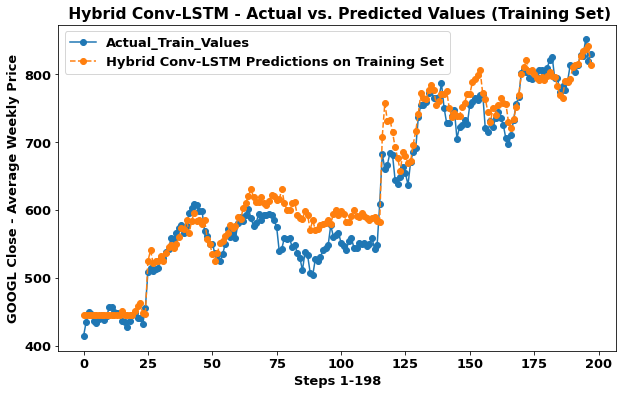

In [153]:
# Hybrid Model performance on training set: Actual vs.Predicted Training Values'for 198 training steps (198 training sequences)

plt.figure(figsize=(10,6))
plt.plot(ytrain_seq,marker='o',linestyle='-')

plt.plot(conv_trainset_predictions,marker='o',linestyle='dashed')
plt.title(' Hybrid Conv-LSTM - Actual vs. Predicted Values (Training Set)',fontweight='bold')
plt.legend(('Actual_Train_Values','Hybrid Conv-LSTM Predictions on Training Set'))
plt.xlabel('Steps 1-198',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

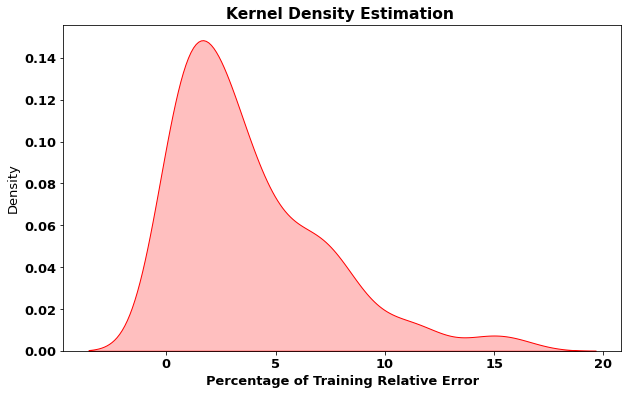

In [154]:
# Training relative Error Percentage distribution plot
conv_train_err=abs((ytrain_seq-conv_trainset_predictions)/ytrain_seq)*100
conv_train_err=pd.DataFrame(conv_train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(conv_train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [155]:
# Summary statistics of training relative error

conv_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,198.0,3.811118,3.433226,0.019905,1.306744,2.805174,5.629245,16.07947


In [156]:
# Determining the Root Mean Squared Error of the train_set_predicted values and the actual_train values
RMSE=np.sqrt(mean_squared_error(ytrain_seq,conv_trainset_predictions))
RMSE=RMSE.round(2)
RMSE

29.46

***Time Series Forecasting & comparison with Test Set*** 

In [157]:
# Creating the first batch to forecast the first GOOGL Close price.
# First batch consists of the final train batch, where the last X train input (X_train[-1]) is appended 
train_batch=train_batch.reshape(1,seq_len,features_num)
first_batch=np.append(train_batch[:,1:,:],[[X_train[-1].reshape((1,features_num))]])
first_batch=first_batch.reshape((1,no_sub_seq, sub_seq_len, features_num))
print(first_batch)
X_train[-1]

[[[[0.85806043 0.85187924 0.8575283  0.03166475]
   [0.84598644 0.85009322 0.84011992 0.16424988]
   [0.85734891 0.86280911 0.86243346 0.10823462]
   [0.92106321 0.92149912 0.92810612 0.13457196]
   [0.91526665 0.90783283 0.92036614 0.02349207]
   [0.90610943 0.89810875 0.90423963 0.03278214]]

  [[0.90907408 0.91387402 0.91654029 0.0964174 ]
   [0.95180413 0.94424431 0.95768955 0.04221066]
   [0.95525182 0.94338797 0.95902415 0.02800441]
   [1.         1.         1.         0.22075701]
   [0.9427742  0.93570083 0.94070964 0.16433382]
   [0.95275716 0.94550553 0.95898134 0.05204019]]]]


array([0.95275716, 0.94550553, 0.95898134, 0.05204019])

In [158]:
# Determining all predicted values so as to compare them with the actual test values 
lstm_outputs = []
batch =first_batch

# loop to determine all predictions based on the X_test inputs that are appended to the batch
for i in range(len(X_test)):
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
# The first row of the current batch sequence is dropped, and the next X_test input is placed at the end of the batch
    batch=batch.reshape(1,12,4)
    batch = np.append(batch[:,1:,:],[[X_test[i]]],axis=1)
    batch=batch.reshape((1,no_sub_seq, sub_seq_len, features_num))
    



In [159]:
# Applying the inverse_transform function to the predicted values to get their true values
conv_lstm_predictions=scaler.inverse_transform(lstm_outputs)
conv_lstm_predictions

array([[ 813.86818858],
       [ 833.54371788],
       [ 848.63830114],
       [ 826.51787648],
       [ 828.72651616],
       [ 838.21825404],
       [ 841.47610272],
       [ 827.86320388],
       [ 837.55550374],
       [ 850.8273325 ],
       [ 837.34762277],
       [ 848.74153157],
       [ 881.59123036],
       [ 903.14290449],
       [ 894.26110008],
       [ 922.65979209],
       [ 919.72924943],
       [ 943.12104699],
       [ 948.95247404],
       [ 918.89204516],
       [ 911.64920138],
       [ 916.53850053],
       [ 963.5653699 ],
       [ 951.88913407],
       [ 957.18616612],
       [ 938.55880806],
       [ 945.60240072],
       [ 935.93063771],
       [ 961.78745783],
       [ 933.64383784],
       [ 919.76464272],
       [ 957.70390224],
       [ 925.44319042],
       [ 933.27319143],
       [ 942.09076357],
       [ 966.02400202],
       [ 959.38683139],
       [ 953.01631208],
       [ 969.7488182 ],
       [ 972.53877084],
       [ 976.3454067 ],
       [1003.653

In [160]:
# Applying the inverse_transform function to the y_test set
y_test=scaler.inverse_transform(y_test)

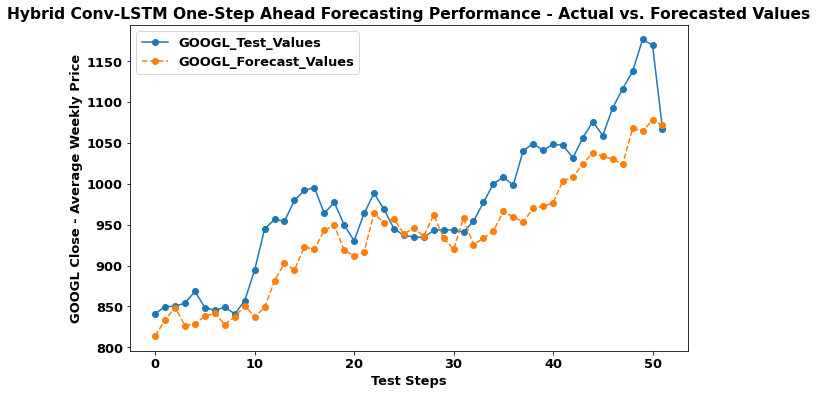

In [161]:
# Plot of the Test vs. Predicted results for a prediction horizon of 52 weeks
plt.figure(figsize=(10,6))
plt.plot(y_test,marker='o',linestyle='-')
plt.plot(conv_lstm_predictions,marker='o',linestyle='dashed')
plt.title('Hybrid Conv-LSTM One-Step Ahead Forecasting Performance - Actual vs. Forecasted Values',fontweight='bold')
plt.legend(('GOOGL_Test_Values','GOOGL_Forecast_Values'))
plt.xlabel('Test Steps',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

In [162]:
# Date index of first y_train value
data.index[seq_len]

Timestamp('2013-05-05 00:00:00', freq='W-SUN')

In [163]:
# Hybrid model training outputs indices
conv_trainset_index=pd.date_range(start='2013-05-05',periods=198,freq='W')

In [164]:
# Converting the train_predictions from np.ndarray to pandas dataframe
conv_train_data=pd.DataFrame(data=conv_trainset_predictions,index=conv_trainset_index,columns=['Predicted (Train_Set)'])

In [165]:
# Date index of first forecasted value
data.index[-pred_horizon]

Timestamp('2017-02-19 00:00:00', freq='W-SUN')

In [166]:
# Hybrid model forecasted outputs indices
conv_pred_index=pd.date_range(start='2017-02-19',periods=pred_horizon,freq='W')

In [167]:
# Converting the Conv-LSTM predictions from np.ndarray to pandas dataframe
conv_pred_data=pd.DataFrame(data=conv_lstm_predictions,index=conv_pred_index,columns=['Hybrid Conv-LSTM Forecast'])

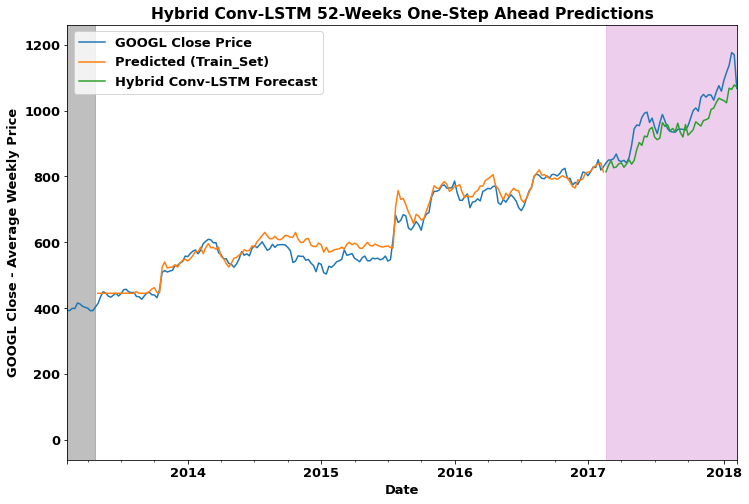

In [168]:
# Final plot comprising all the actual GOOGL Close values, the model's predictions on the training set (index 12 to 209) & 
# the forecasts from index 210 (time step 211)  to 261 (time step 262)

ax=data['close'].plot(figsize=(12,8),label='GOOGL Close Price')
ax.fill_between(data.index,0,1200 ,where=data.index < conv_trainset_index[0],
                color='grey', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(data.index,0,1200 ,where=data.index > conv_trainset_index[-1],
                color='plum', alpha=0.5, transform=ax.get_xaxis_transform())
conv_train_data.plot(ax=ax)
conv_pred_data.plot(ax=ax)
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold')
plt.title('Hybrid Conv-LSTM 52-Weeks One-Step Ahead Predictions',fontweight='bold')
plt.show()


In [169]:
# RMSE of forecasted and test GOOGL Close prices
RMSE=np.sqrt(mean_squared_error(y_test,conv_lstm_predictions))
RMSE=RMSE.round(2)
RMSE

49.31

***v) Time Series Forecasting (ConvLSTM)***

In [170]:
# Function to create the input-output sequence. Each train batch consists of 12 inputs & the corresponding 
# y_target value (one step-ahead)
from numpy import array

def set_seq(seq, seq_len):
    X = []
    y = []
    for t in range(len(seq)-seq_len):
        end = t + seq_len # End index is equal to the current index plus the specified number of sequence length
        
        if end> len(seq)-1:# if the length of the formed train sequence is greater than the length of the input feature,stop
            break
# for seq_length=12 : X_input seq. ->12 (indices 0-11) past observations, y_target -> 1 observation at one time step ahead
# (index 12)
        Xseq= seq[t:end, :-1]
        y_target =seq[end, -1]
        X.append(Xseq)
        y.append(y_target)
    return array(X), array(y) #initializing the arrays

In [171]:
# Defining the inputs and output of the ConvLSTM model so as to create the sequences
input_1 =data['open'].values
input_2 = data['high'].values
input_3 = data['low'].values
input_4 = data['volume'].values
output_feat = data['close'].values

In [172]:
# Reshaping for converting the inputs/output to 2d shape
input_1 = input_1.reshape((len(input_1), 1))
input_2 = input_2.reshape((len(input_2), 1))
input_3 = input_3.reshape((len(input_3), 1))
input_4 = input_4.reshape((len(input_4), 1))
output_feat = output_feat.reshape((len(output_feat), 1))

In [173]:
# Use of hstack to put together the input sequence arrays horizontally (column wise)
from numpy import hstack
df = hstack((input_1, input_2,input_3, input_4))
df[:5]

array([[3.90455100e+02, 3.93728300e+02, 3.90169800e+02, 6.03119900e+06],
       [3.91131760e+02, 3.94218840e+02, 3.90182800e+02, 3.87197080e+06],
       [4.00218575e+02, 4.03236575e+02, 3.96908250e+02, 5.62295175e+06],
       [3.99499120e+02, 4.02726320e+02, 3.96714320e+02, 4.38464380e+06],
       [4.14795900e+02, 4.18270820e+02, 4.12145720e+02, 5.85675880e+06]])

In [174]:
# Selecting the length of each sequence and the size of the prediction horizon (forecast_steps)
seq_len= 12
pred_horizon=52
# Splitting the dataset into training and test set (y_test -->to compare the ConvLSTM forecasts for given inputs (X_test))
X_train=df[:-pred_horizon]
y_train=output_feat[:-pred_horizon]
X_test=df[-pred_horizon:]
y_test=output_feat[-pred_horizon:]



In [175]:
# The shape of training and test data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(210, 4) (210, 1)
(52, 4) (52, 1)


In [176]:
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [177]:
# Use of hstack to put together the train sequence arrays horizontally 
df_train = hstack((X_train,y_train))
# Creating the training sequences
Xtrain_seq,ytrain_seq=set_seq(df_train, seq_len)

In [178]:
# The input training data have been converted into 3d shape--> [sample_length,seq_len, number of input features]
print(Xtrain_seq.shape)

(198, 12, 4)


In [179]:
# Presenting the first two training sequences. As it can be observed, the first 12 input entries (seq_len=12),
# i.e. The current index input value at time step 12 and the past 11 observations for each feature, together with the
# GOOGL Close price at time step 13 (one-step ahead),comprise the first sequence.
# In the second batch, the sequence is updated by dropping the first input values and appending the next X-y values
# at the end of the batch.
# As it can be observed, the first two y target values correspond to the y_train values with indices 12 and 13 for
# time steps 13 and 14 respectively
for t in range(2):
    print(Xtrain_seq[t], ytrain_seq[t])
print('\r')
print('The first two ytrain_seq values correspond to the  train target values (y_train) with indexes 12 and 13 : ')
print(y_train[12:14])


[[0.         0.         0.00686396 0.69188401]
 [0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44639133]
 [0.00286412 0.00858992 0.         0.70536546]
 [0.02894855 0.02773971 0.02658795 0.49325622]] 0.04724923430697603
[[0.00147234 0.00105938 0.0068925  0.39447725]
 [0.02124421 0.02053432 0.02165471 0.63565304]
 [0.01967876 0.01943236 0.02122904 0.46509157]
 [0.05296281 0.05300268 0.05510063 0.66785705]
 [0.05121483 0.04674223 0.05309468 0.41122652]
 [0.03451129 0.03206527 0.03785499 0.32098899]
 [0.03159811 0.02673051 0.03185675 0.36681538]
 [0.02236206 0.01960099 0.0217647  0.49236566]
 [0.00465879 0.00162192 0.0039417  0.44

In [180]:
# Defining the number of input features
features_num = Xtrain_seq.shape[2]
features_num

4

In [181]:
# Input training data are converted from 3D to 5D shape-->[sample_length,no_subseq,1(1D),sub_seq_len, number of input features]
# so as to become the inputs of the ConvLSTM layer. The input sequences are split into two sub-sequences and the ConvLSTM
# model extracts information from each subsequence (similar to 2D images)
no_sub_seq=2
sub_seq_len=6
Xtrain_seq = Xtrain_seq.reshape((Xtrain_seq.shape[0], no_sub_seq, 1, sub_seq_len, features_num))
Xtrain_seq.shape

(198, 2, 1, 6, 4)

In [182]:
#First Input sequence to be processed by the ConvLSTM model
Xtrain_seq[0]

array([[[[0.        , 0.        , 0.00686396, 0.69188401],
         [0.00147234, 0.00105938, 0.0068925 , 0.39447725],
         [0.02124421, 0.02053432, 0.02165471, 0.63565304],
         [0.01967876, 0.01943236, 0.02122904, 0.46509157],
         [0.05296281, 0.05300268, 0.05510063, 0.66785705],
         [0.05121483, 0.04674223, 0.05309468, 0.41122652]]],


       [[[0.03451129, 0.03206527, 0.03785499, 0.32098899],
         [0.03159811, 0.02673051, 0.03185675, 0.36681538],
         [0.02236206, 0.01960099, 0.0217647 , 0.49236566],
         [0.00465879, 0.00162192, 0.0039417 , 0.44639133],
         [0.00286412, 0.00858992, 0.        , 0.70536546],
         [0.02894855, 0.02773971, 0.02658795, 0.49325622]]]])

In [183]:
# Reshaping the target train data to be inserted into the ConvLSTM model in the proper dimension
ytrain_seq=ytrain_seq.reshape((-1,1))
ytrain_seq.shape

(198, 1)

In [184]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,ConvLSTM2D

 
from tensorflow.keras import initializers
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# Use of the he_uniform initializer to set the initial weights of the model layers. 
initializer = tf.keras.initializers.he_uniform(seed=0)
model = Sequential()
# ConvLSTM Layer
model.add(ConvLSTM2D(filters=128, kernel_size=(1,2), activation='relu', input_shape=(no_sub_seq,1, sub_seq_len, features_num)))
# Flatten Layer for 1D conversion before the output layer
model.add(Flatten())
model.add(Dense(1,activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# Fitting the ConvLSTM model 
model.fit( Xtrain_seq, ytrain_seq,epochs=60, batch_size=1, shuffle=False,verbose=0)




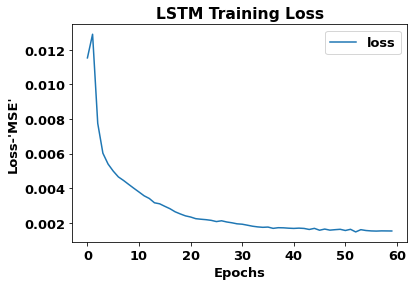

In [185]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

***Training Set Predictions***

In [186]:
# Determining all model predictions on the training set so as to compare them with the actual GOOGL Close training values 

train_lstm_outputs = []
train_batch = Xtrain_seq[0].reshape((1,no_sub_seq,1,sub_seq_len, features_num))

for i in range(len(Xtrain_seq[1:])):
    train_lstm_out = model.predict(train_batch)[0]
    train_lstm_outputs.append(train_lstm_out)
    train_batch=Xtrain_seq[1:][i].reshape((1,no_sub_seq,1,sub_seq_len, features_num))
    
#Append train_convlstm_output from last train batch    
train_lstm_outputs.append(model.predict(train_batch)[0]) 

In [187]:
# Last appended input to the final train sequence (train_batch) is X_train[-2]. 
# The X_train[-1] is to be appended to the input sequence after training to determine the first forecasted value 
# This is because the model is trained to predict one step ahead 
print('Final train batch (sequence): \n')
print(train_batch)
print("\r")
print('Last input of the final train batch: \n')
print(X_train[-2])

Final train batch (sequence): 

[[[[[0.83773548 0.8409872  0.83195241 0.18540854]
    [0.85806043 0.85187924 0.8575283  0.03166475]
    [0.84598644 0.85009322 0.84011992 0.16424988]
    [0.85734891 0.86280911 0.86243346 0.10823462]
    [0.92106321 0.92149912 0.92810612 0.13457196]
    [0.91526665 0.90783283 0.92036614 0.02349207]]]


  [[[0.90610943 0.89810875 0.90423963 0.03278214]
    [0.90907408 0.91387402 0.91654029 0.0964174 ]
    [0.95180413 0.94424431 0.95768955 0.04221066]
    [0.95525182 0.94338797 0.95902415 0.02800441]
    [1.         1.         1.         0.22075701]
    [0.9427742  0.93570083 0.94070964 0.16433382]]]]]

Last input of the final train batch: 

[0.9427742  0.93570083 0.94070964 0.16433382]


In [188]:
# Applying the inverse_transform function to the training_outputs to get their true values
convlstm_trainset_predictions=scaler.inverse_transform(train_lstm_outputs)
convlstm_trainset_predictions=convlstm_trainset_predictions.reshape((-1,1))

In [189]:
# Length of train sequences
len(Xtrain_seq)

198

In [190]:
# Applying the inverse_transform function to the ytrain_seq set
ytrain_seq=scaler.inverse_transform(ytrain_seq)

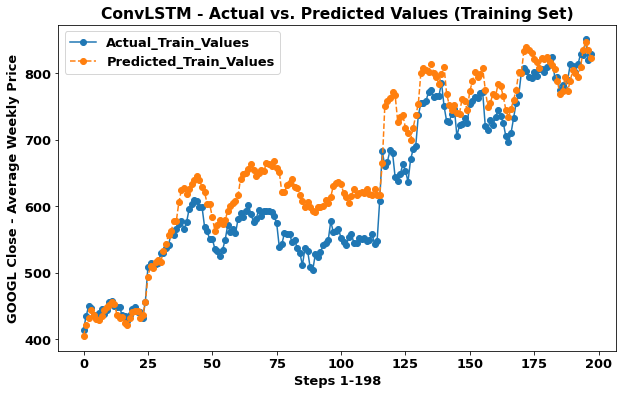

In [191]:
# ConvLSTM Training Performance - Actual vs. Predicted Training Values'for 198 training steps (198 training sequences)

plt.figure(figsize=(10,6))
plt.plot(ytrain_seq,marker='o',linestyle='-')

plt.plot(convlstm_trainset_predictions,marker='o',linestyle='dashed')
plt.title('ConvLSTM - Actual vs. Predicted Values (Training Set)',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Steps 1-198',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

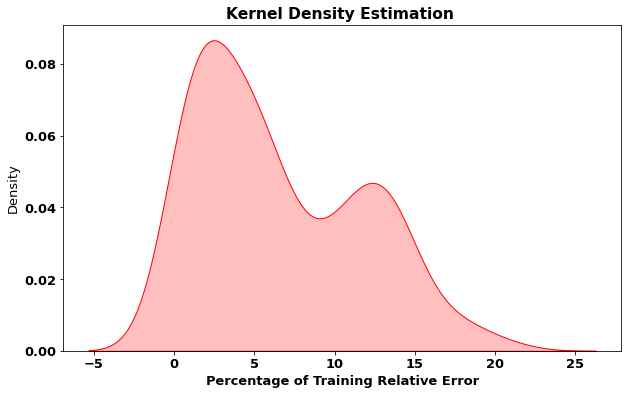

In [192]:
# Training relative Error Percentage distribution plot
convlstm_train_err=abs((ytrain_seq-convlstm_trainset_predictions)/ytrain_seq)*100
convlstm_train_err=pd.DataFrame(convlstm_train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(convlstm_train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [193]:
# Summary statistics of training relative error

convlstm_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,198.0,6.568703,5.120558,0.004091,2.365664,5.108692,11.137006,20.947975


In [194]:
# Determining the Root Mean Squared Error of the train_predicted values and the actual_train values
RMSE=np.sqrt(mean_squared_error(ytrain_seq,convlstm_trainset_predictions))
RMSE=RMSE.round(2)
RMSE

48.6

In [195]:
train_batch=train_batch.reshape(1,12,4)


***Time Series Forecasting & comparison with Test Set*** 

In [196]:
# Creating the first batch to forecast the first GOOGL Close price.
# First batch consists of the final train batch, where the last X train input (X_train[-1]) is appended 
train_batch=train_batch.reshape(1,seq_len,features_num)
first_batch=np.append(train_batch[:,1:,:],[[X_train[-1].reshape((1,features_num))]])
first_batch=first_batch.reshape((1,no_sub_seq,1, sub_seq_len, features_num))
print(first_batch)
X_train[-1]

[[[[[0.85806043 0.85187924 0.8575283  0.03166475]
    [0.84598644 0.85009322 0.84011992 0.16424988]
    [0.85734891 0.86280911 0.86243346 0.10823462]
    [0.92106321 0.92149912 0.92810612 0.13457196]
    [0.91526665 0.90783283 0.92036614 0.02349207]
    [0.90610943 0.89810875 0.90423963 0.03278214]]]


  [[[0.90907408 0.91387402 0.91654029 0.0964174 ]
    [0.95180413 0.94424431 0.95768955 0.04221066]
    [0.95525182 0.94338797 0.95902415 0.02800441]
    [1.         1.         1.         0.22075701]
    [0.9427742  0.93570083 0.94070964 0.16433382]
    [0.95275716 0.94550553 0.95898134 0.05204019]]]]]


array([0.95275716, 0.94550553, 0.95898134, 0.05204019])

In [197]:
# Determining all ConvLSTM predicted values so as to compare them with the actual test values 
lstm_outputs = []
batch =first_batch

# loop to determine all other predictions based on the X_test inputs that are appended to the batch
for i in range(len(X_test)):
    
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
# The first row of the current batch sequence is dropped, and the next X_test input is placed at the end of the batch
    batch=batch.reshape(1,seq_len,features_num)
    batch = np.append(batch[:,1:,:],[[X_test[i]]],axis=1)
    batch=batch.reshape((1,no_sub_seq,1, sub_seq_len, features_num))
    



In [198]:
# Applying the inverse_transform function to the predicted values to get their true values
ConvLSTM_predictions=scaler.inverse_transform(lstm_outputs)
ConvLSTM_predictions

array([[ 834.51815308],
       [ 836.74208616],
       [ 844.76658641],
       [ 843.02297525],
       [ 840.1046673 ],
       [ 846.81906958],
       [ 813.95306694],
       [ 823.98346012],
       [ 834.62744625],
       [ 841.50958433],
       [ 849.53364763],
       [ 862.02365607],
       [ 925.11536553],
       [ 944.93407925],
       [ 928.01117033],
       [ 953.21807568],
       [ 968.08096397],
       [ 959.16070759],
       [ 901.24575854],
       [ 935.43311072],
       [ 883.91096565],
       [ 886.46288749],
       [ 923.94214347],
       [ 935.03848645],
       [ 884.24785735],
       [ 912.72525574],
       [ 871.87773822],
       [ 886.56742878],
       [ 899.27159941],
       [ 899.87951195],
       [ 903.00220523],
       [ 900.47600907],
       [ 888.85007759],
       [ 892.30654926],
       [ 949.23906139],
       [ 967.94610898],
       [ 975.05147604],
       [ 939.42556136],
       [ 989.33223208],
       [ 998.28935648],
       [ 983.40265418],
       [ 989.485

In [199]:
# Applying the inverse_transform function to the y_test set
y_test=scaler.inverse_transform(y_test)

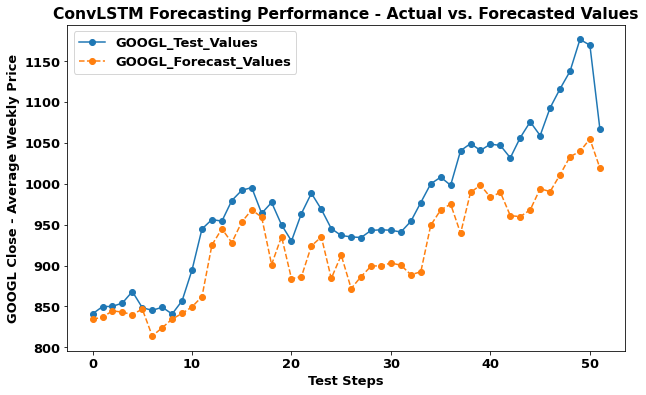

In [200]:
# Plot of the Test vs. Predicted results for a prediction horizon of 52 weeks
plt.figure(figsize=(10,6))
plt.plot(y_test,marker='o',linestyle='-')
plt.plot(ConvLSTM_predictions,marker='o',linestyle='dashed')
plt.title('ConvLSTM Forecasting Performance - Actual vs. Forecasted Values',fontweight='bold')
plt.legend(('GOOGL_Test_Values','GOOGL_Forecast_Values'))
plt.xlabel('Test Steps',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold');

In [201]:
# Date index of first y_train value
data.index[seq_len]

Timestamp('2013-05-05 00:00:00', freq='W-SUN')

In [202]:
# ConvLSTM training outputs indices
convlstm_trainset_index=pd.date_range(start='2013-05-05',periods=198,freq='W')

In [203]:
# Converting the train_predictions from np.ndarray to pandas dataframe
convlstm_train_data=pd.DataFrame(data=convlstm_trainset_predictions,index=convlstm_trainset_index,columns=['Predicted (Train_Set)'])

In [204]:
# Date index of first forecasted value
data.index[-pred_horizon]

Timestamp('2017-02-19 00:00:00', freq='W-SUN')

In [205]:
# LSTM forecasted outputs indices
convlstm_pred_index=pd.date_range(start='2017-02-19',periods=pred_horizon,freq='W')

In [206]:
# Converting the ConvLSTM_predictions from np.ndarray to pandas dataframe
convlstm_pred_data=pd.DataFrame(data=ConvLSTM_predictions,index=convlstm_pred_index,columns=['ConvLSTM Forecast'])

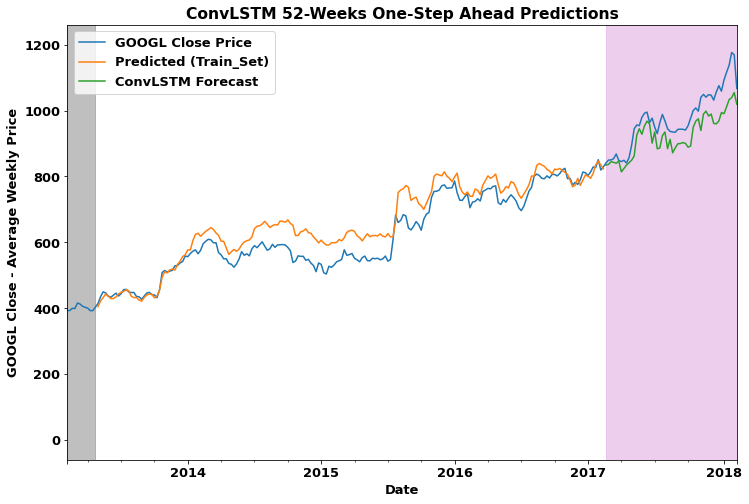

In [207]:
# Final plot comprising all the actual GOOGL Close values, the LSTM model's predictions on the training set (index 12 to 209) & 
# the LSTM forecasts from index 210 (time step 211)  to 261 (time step 262)

ax=data['close'].plot(figsize=(12,8),label='GOOGL Close Price')
ax.fill_between(data.index,0,1200 ,where=data.index < convlstm_trainset_index[0],
                color='grey', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(data.index,0,1200 ,where=data.index > convlstm_trainset_index[-1],
                color='plum', alpha=0.5, transform=ax.get_xaxis_transform())
convlstm_train_data.plot(ax=ax)
convlstm_pred_data.plot(ax=ax)
plt.legend()
plt.xlabel('Date',fontweight='bold')
plt.ylabel('GOOGL Close - Average Weekly Price',fontweight='bold')
plt.title('ConvLSTM 52-Weeks One-Step Ahead Predictions',fontweight='bold')
plt.show()


In [208]:
# RMSE of forecasted and test GOOGL Close prices
RMSE=np.sqrt(mean_squared_error(y_test,ConvLSTM_predictions))
RMSE=RMSE.round(2)
RMSE

60.55